## problem statement

#### here is XYZ companies  2014-2018 sales data to identify key revenue and   profit drivers across products , channels and regions , uncover seasonal trends and outliers and align performance against budgets . use these useful insights to optimize pricing , promotion and market expansions for sustainable growth and reduced concentration risk                                       


In [1]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
 #!pip install openpyxl

In [3]:
sheets = pd.read_excel("Regional Sales Dataset.xlsx",sheet_name=None)

In [4]:
# sheets = pd.read_excel("Regional Sales Dataset.xlsx", sheet_name=None, thousands=",")

In [5]:
sheets

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [6]:
xls = pd.ExcelFile("Regional Sales Dataset.xlsx")
xls.sheet_names

['Sales Orders',
 'Customers',
 'Regions',
 'State Regions',
 'Products',
 '2017 Budgets']

In [7]:
#assign different dataframes to different sheet

df_sales_orders=sheets['Sales Orders']
df_customers=sheets['Customers']
df_regions = sheets['Regions']
df_state_regions = sheets['State Regions']
df_products = sheets['Products']
df_2017_budgets = sheets['2017 Budgets']


In [8]:
df_sales_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 0 non-null      float64       
 11  Total Unit Cost            64104 non-null  float64       
dtypes: d

In [9]:
print(df_sales_orders.columns.tolist())

# print(df['Line Total'].dtype)

['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index', 'Product Description Index', 'Order Quantity', 'Unit Price', 'Line Total', 'Total Unit Cost']


In [10]:
df_sales_orders.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost'],
      dtype='object')

not checkking using heads here for evry df 
will just check from the excel file 

In [11]:
df_state_regions.columns

Index(['Column1', 'Column2', 'Column3'], dtype='object')

In [12]:
df_state_regions.head(2)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South


In [13]:
df_state_regions.columns = df_state_regions.iloc[0]

In [14]:
df_state_regions.drop(index=0).reset_index(drop=True)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West
5,CT,Connecticut,Northeast
6,DC,District of Columbia,South
7,DE,Delaware,South
8,FL,Florida,South
9,GA,Georgia,South


In [15]:
df_state_regions.head(5)

,State Code,State,Region
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [16]:
df_state_regions = df_state_regions.drop(index=0).reset_index(drop=True)

In [17]:
df_state_regions.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [18]:
df_sales_orders.isnull().sum()

OrderNumber                      0
OrderDate                        0
Customer Name Index              0
Channel                          0
Currency Code                    0
Warehouse Code                   0
Delivery Region Index            0
Product Description Index        0
Order Quantity                   0
Unit Price                       0
Line Total                   64104
Total Unit Cost                  0
dtype: int64

In [19]:
df_sales_orders.isnull().value_counts()

OrderNumber  OrderDate  Customer Name Index  Channel  Currency Code  Warehouse Code  Delivery Region Index  Product Description Index  Order Quantity  Unit Price  Line Total  Total Unit Cost
False        False      False                False    False          False           False                  False                      False           False       True        False              64104
Name: count, dtype: int64

In [20]:
# df_sales_orders=sheets['Sales Orders']
# df_customers=sheets['Customers']
# df_regions = sheets['Regions']
# df_state_regions = sheets['State Regions']
# df_products = sheets['Products']
# df_2017_budgets = sheets['2017 Budgets']




list_of_df = ['df_sales_orders','df_customers','df_regions','df_state_regions','df_products','df_2017_budgets']

print('all df names:\n\n')
for df_names in list_of_df:
    print(f"{df_names}")



all df names:


df_sales_orders
df_customers
df_regions
df_state_regions
df_products
df_2017_budgets


In [21]:
def find_null_count(df_name):
    print("-"*20)
    # print ("df name : "+df_name)
    print("df null values")
    print (df_name.isnull().sum())
    print("-"*20)



for df_names in list_of_df:
    find_null_count(globals()[df_names])

--------------------
df null values
OrderNumber                      0
OrderDate                        0
Customer Name Index              0
Channel                          0
Currency Code                    0
Warehouse Code                   0
Delivery Region Index            0
Product Description Index        0
Order Quantity                   0
Unit Price                       0
Line Total                   64104
Total Unit Cost                  0
dtype: int64
--------------------
--------------------
df null values
Customer Index    0
Customer Names    0
dtype: int64
--------------------
--------------------
df null values
id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64
--------------------
--------------------
df null values
0
State C

In [22]:
def find_null_count(df, df_name):
    print("-" * 20)
    print("df name :", df_name)
    print("df null values")
    print(df.isnull().sum())
    print("-" * 20)

for df_name in list_of_df:
    find_null_count(globals()[df_name], df_name)

--------------------
df name : df_sales_orders
df null values
OrderNumber                      0
OrderDate                        0
Customer Name Index              0
Channel                          0
Currency Code                    0
Warehouse Code                   0
Delivery Region Index            0
Product Description Index        0
Order Quantity                   0
Unit Price                       0
Line Total                   64104
Total Unit Cost                  0
dtype: int64
--------------------
--------------------
df name : df_customers
df null values
Customer Index    0
Customer Names    0
dtype: int64
--------------------
--------------------
df name : df_regions
df null values
id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: in

### data cleaning and wrangling 

In [23]:
df_sales_orders.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,NaN,1824.343


In [24]:
df_customers.head(1)

,Customer Index,Customer Names
0,1,Geiss Company


In [25]:
# pd.merge(df_sales_orders,
#          df_customers,
#          how='left',
#          on='Customer Name Index'
#          )

df_sales_orders.merge(df_customers,
                      how='left',
         left_on='Customer Name Index',
         right_on='Customer Index')


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,NaN,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,NaN,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,NaN,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,NaN,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,NaN,1260.270,73,Deseret Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,NaN,980.478,74,Dazzlesphe Corp
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,NaN,579.081,51,Yombu Corp
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,NaN,2648.510,136,Bath Group
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,NaN,2930.178,158,Linklinks Ltd


In [26]:
#merge with customers

df = df_sales_orders.merge(df_customers,
                      how='left',
         left_on='Customer Name Index',
         right_on='Customer Index')

In [27]:
df.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,NaN,1824.343,126,Rhynoodle Ltd


In [28]:
df.drop(columns=['Customer Name Index','Customer Index'])

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,364,27,6,2499.1,NaN,1824.343,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,488,20,11,2351.7,NaN,1269.918,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,155,26,6,978.2,NaN,684.740,Amerisourc Corp
3,SO - 0005614,2014-01-01,Export,USD,AXW291,473,7,7,2338.3,NaN,1028.852,Colgate-Pa Group
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,256,8,8,2291.4,NaN,1260.270,Deseret Group
...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Wholesale,USD,AXW291,825,26,12,1815.7,NaN,980.478,Dazzlesphe Corp
64100,SO - 0007706,2018-02-28,Export,USD,NXH382,444,21,6,864.3,NaN,579.081,Yombu Corp
64101,SO - 0007718,2018-02-28,Distributor,USD,AXW291,312,13,11,3953.0,NaN,2648.510,Bath Group
64102,SO - 0008084,2018-02-28,Distributor,USD,AXW291,737,20,7,3959.7,NaN,2930.178,Linklinks Ltd


In [29]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,NaN,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,NaN,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,NaN,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,NaN,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,NaN,1260.270,73,Deseret Group


In [30]:
df = df.drop(columns=['Customer Name Index','Customer Index'])

In [31]:
df.head(1)

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,364,27,6,2499.1,NaN,1824.343,Rhynoodle Ltd


In [32]:
df.query("`Product Description Index` == 1")

#The syntax you're using in df.query() is slightly off. When using query(), column names that contain spaces or special characters should be enclosed in backticks (`), not single quotes. Here's the corrected version:



,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names
6,SO - 0008865,2014-01-01,Wholesale,USD,GUT930,540,1,7,2874.3,NaN,1667.094,Kare Corp
85,SO - 0004792,2014-01-03,Wholesale,USD,AXW291,219,1,6,167.5,NaN,83.750,Skinder Group
132,SO - 0003563,2014-01-03,Wholesale,USD,GUT930,202,1,12,1165.8,NaN,827.718,Browsebug Company
150,SO - 0004196,2014-01-04,Distributor,USD,GUT930,397,1,6,1011.7,NaN,829.594,Voonyx Group
161,SO - 0002523,2014-01-04,Export,USD,AXW291,799,1,5,3999.9,NaN,1639.959,Centizu Company
...,...,...,...,...,...,...,...,...,...,...,...,...
64042,SO - 0008393,2018-02-27,Wholesale,USD,AXW291,615,1,10,2438.8,NaN,1999.816,Topco Company
64069,SO - 000989,2018-02-28,Distributor,USD,NXH382,654,1,6,1125.6,NaN,754.152,EMD Group
64070,SO - 0003418,2018-02-28,Export,USD,AXW291,704,1,12,917.9,NaN,523.203,Skyvu Group
64082,SO - 0006699,2018-02-28,Distributor,USD,GUT930,406,1,8,1869.3,NaN,1383.282,Skiptube Ltd


In [33]:
df_products.columns

Index(['Index', 'Product Name'], dtype='object')

In [34]:
# there fore 1:n realtion 


df.merge(df_products,
         how='left',
         left_on='Product Description Index',
         right_on='Index')

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,364,27,6,2499.1,NaN,1824.343,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,488,20,11,2351.7,NaN,1269.918,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,155,26,6,978.2,NaN,684.740,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,Export,USD,AXW291,473,7,7,2338.3,NaN,1028.852,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,256,8,8,2291.4,NaN,1260.270,Deseret Group,8,Product 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Wholesale,USD,AXW291,825,26,12,1815.7,NaN,980.478,Dazzlesphe Corp,26,Product 26
64100,SO - 0007706,2018-02-28,Export,USD,NXH382,444,21,6,864.3,NaN,579.081,Yombu Corp,21,Product 21
64101,SO - 0007718,2018-02-28,Distributor,USD,AXW291,312,13,11,3953.0,NaN,2648.510,Bath Group,13,Product 13
64102,SO - 0008084,2018-02-28,Distributor,USD,AXW291,737,20,7,3959.7,NaN,2930.178,Linklinks Ltd,20,Product 20


In [35]:
df = df.merge(df_products,
         how='left',
         left_on='Product Description Index',
         right_on='Index')

In [36]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Channel', 'Currency Code',
       'Warehouse Code', 'Delivery Region Index', 'Product Description Index',
       'Order Quantity', 'Unit Price', 'Line Total', 'Total Unit Cost',
       'Customer Names', 'Index', 'Product Name'],
      dtype='object')

In [37]:
cols = ['OrderNumber', 'OrderDate', 'Channel', 'Currency Code',
       'Warehouse Code', 'Delivery Region Index', 
    #    'Product Description Index',
       'Order Quantity', 'Unit Price', 'Line Total', 'Total Unit Cost',
       'Customer Names', 
    #    'Index',
       'Product Name']
df[cols]

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Delivery Region Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Product Name
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,364,6,2499.1,NaN,1824.343,Rhynoodle Ltd,Product 27
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,488,11,2351.7,NaN,1269.918,Thoughtmix Ltd,Product 20
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,155,6,978.2,NaN,684.740,Amerisourc Corp,Product 26
3,SO - 0005614,2014-01-01,Export,USD,AXW291,473,7,2338.3,NaN,1028.852,Colgate-Pa Group,Product 7
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,256,8,2291.4,NaN,1260.270,Deseret Group,Product 8
...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Wholesale,USD,AXW291,825,12,1815.7,NaN,980.478,Dazzlesphe Corp,Product 26
64100,SO - 0007706,2018-02-28,Export,USD,NXH382,444,6,864.3,NaN,579.081,Yombu Corp,Product 21
64101,SO - 0007718,2018-02-28,Distributor,USD,AXW291,312,11,3953.0,NaN,2648.510,Bath Group,Product 13
64102,SO - 0008084,2018-02-28,Distributor,USD,AXW291,737,7,3959.7,NaN,2930.178,Linklinks Ltd,Product 20


In [38]:
df = df[cols]

In [39]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Channel', 'Currency Code',
       'Warehouse Code', 'Delivery Region Index', 'Order Quantity',
       'Unit Price', 'Line Total', 'Total Unit Cost', 'Customer Names',
       'Product Name'],
      dtype='object')

In [40]:
# merge with regions 

df.head(1)

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Delivery Region Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Product Name
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,364,6,2499.1,NaN,1824.343,Rhynoodle Ltd,Product 27


In [41]:
df.query('`Delivery Region Index`==1')

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Delivery Region Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Product Name
24,SO - 0010604,2014-01-01,Wholesale,USD,NXH382,1,11,5078.6,NaN,4113.666,Realbridge Corp,Product 19
3177,SO - 0007380,2014-03-17,Wholesale,USD,NXH382,1,10,1112.2,NaN,600.588,NCS Group,Product 25
3326,SO - 0007337,2014-03-20,Export,USD,NXH382,1,5,1882.7,NaN,1016.658,Organon Corp,Product 20
3700,SO - 0010138,2014-03-29,Wholesale,USD,NXH382,1,10,1835.8,NaN,1321.776,Yodoo Ltd,Product 2
4925,SO - 0005470,2014-04-27,Export,USD,NXH382,1,7,234.5,NaN,192.290,Cogidoo Company,Product 25
...,...,...,...,...,...,...,...,...,...,...,...,...
59177,SO - 0008202,2017-11-04,Distributor,USD,GUT930,1,8,1112.2,NaN,767.418,Aromaticos Company,Product 15
60024,SO - 0006977,2017-11-24,Distributor,USD,AXW291,1,5,167.5,NaN,73.700,Tambee Company,Product 10
63177,SO - 0007488,2018-02-06,Wholesale,USD,AXW291,1,10,877.7,NaN,561.728,Wise Company,Product 15
63326,SO - 0009018,2018-02-10,Wholesale,USD,GUT930,1,7,1735.3,NaN,1180.004,Skiptube Ltd,Product 26


In [42]:
df_regions.columns

Index(['id', 'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone'],
      dtype='object')

In [43]:
pd.set_option('display.max_columns', None)

In [44]:
df.merge(df_regions,
         how='left',
         left_on='Delivery Region Index',
         right_on='id')

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Delivery Region Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Product Name,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,364,6,2499.1,NaN,1824.343,Rhynoodle Ltd,Product 27,364,Savannah,Chatham County,GA,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,488,11,2351.7,NaN,1269.918,Thoughtmix Ltd,Product 20,488,Greenwood,Johnson County,IN,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,155,6,978.2,NaN,684.740,Amerisourc Corp,Product 26,155,Pleasanton,Alameda County,CA,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,Export,USD,AXW291,473,7,2338.3,NaN,1028.852,Colgate-Pa Group,Product 7,473,Bloomington,Monroe County,IN,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,256,8,2291.4,NaN,1260.270,Deseret Group,Product 8,256,Manchester,Hartford County,CT,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Wholesale,USD,AXW291,825,12,1815.7,NaN,980.478,Dazzlesphe Corp,Product 26,825,Levittown,Bucks County,PA,Pennsylvania,CDP,40.15511,-74.82877,445,51326,18095,69878,26311722,253129,America/New York
64100,SO - 0007706,2018-02-28,Export,USD,NXH382,444,6,864.3,NaN,579.081,Yombu Corp,Product 21,444,Palatine,Cook County,IL,Illinois,Village,42.11030,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago
64101,SO - 0007718,2018-02-28,Distributor,USD,AXW291,312,11,3953.0,NaN,2648.510,Bath Group,Product 13,312,Margate,Broward County,FL,Florida,City,26.24453,-80.20644,954,57234,20651,42786,22943340,594611,America/New York
64102,SO - 0008084,2018-02-28,Distributor,USD,AXW291,737,7,3959.7,NaN,2930.178,Linklinks Ltd,Product 20,737,Cheektowaga,Erie County,NY,New York,Town,42.91002,-78.74182,716,87514,38912,48662,76228647,162756,America/New York


In [45]:
df = df.merge(df_regions,
         how='left',
         left_on='Delivery Region Index',
         right_on='id')

In [46]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Channel', 'Currency Code',
       'Warehouse Code', 'Delivery Region Index', 'Order Quantity',
       'Unit Price', 'Line Total', 'Total Unit Cost', 'Customer Names',
       'Product Name', 'id', 'name', 'county', 'state_code', 'state', 'type',
       'latitude', 'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone'],
      dtype='object')

In [47]:
cols = ['OrderNumber', 'OrderDate', 'Channel', 'Currency Code',
       'Warehouse Code', 
    #    'Delivery Region Index', 
       'Order Quantity',
       'Unit Price', 'Line Total', 'Total Unit Cost', 'Customer Names',
       'Product Name', 
    #    'id', 
       'name', 'county', 'state_code', 'state', 'type',
       'latitude', 'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone']

df = df[cols]

In [48]:
df.head(1)

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Product Name,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,NaN,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,GA,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York


In [49]:
df_state_regions.head(1)

,State Code,State,Region
0,AL,Alabama,South


In [50]:
df.merge(df_state_regions,
         how='left',
         left_on='state_code',
         right_on='State Code')

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Product Name,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,State,Region
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,NaN,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,GA,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,11,2351.7,NaN,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,IN,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Indiana,Midwest
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,6,978.2,NaN,684.740,Amerisourc Corp,Product 26,Pleasanton,Alameda County,CA,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,California,West
3,SO - 0005614,2014-01-01,Export,USD,AXW291,7,2338.3,NaN,1028.852,Colgate-Pa Group,Product 7,Bloomington,Monroe County,IN,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Indiana,Midwest
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,8,2291.4,NaN,1260.270,Deseret Group,Product 8,Manchester,Hartford County,CT,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Connecticut,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Wholesale,USD,AXW291,12,1815.7,NaN,980.478,Dazzlesphe Corp,Product 26,Levittown,Bucks County,PA,Pennsylvania,CDP,40.15511,-74.82877,445,51326,18095,69878,26311722,253129,America/New York,PA,Pennsylvania,Northeast
64100,SO - 0007706,2018-02-28,Export,USD,NXH382,6,864.3,NaN,579.081,Yombu Corp,Product 21,Palatine,Cook County,IL,Illinois,Village,42.11030,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago,IL,Illinois,Midwest
64101,SO - 0007718,2018-02-28,Distributor,USD,AXW291,11,3953.0,NaN,2648.510,Bath Group,Product 13,Margate,Broward County,FL,Florida,City,26.24453,-80.20644,954,57234,20651,42786,22943340,594611,America/New York,FL,Florida,South
64102,SO - 0008084,2018-02-28,Distributor,USD,AXW291,7,3959.7,NaN,2930.178,Linklinks Ltd,Product 20,Cheektowaga,Erie County,NY,New York,Town,42.91002,-78.74182,716,87514,38912,48662,76228647,162756,America/New York,NY,New York,Northeast


In [51]:
df = df.merge(df_state_regions,
         how='left',
         left_on='state_code',
         right_on='State Code')

In [52]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Channel', 'Currency Code',
       'Warehouse Code', 'Order Quantity', 'Unit Price', 'Line Total',
       'Total Unit Cost', 'Customer Names', 'Product Name', 'name', 'county',
       'state_code', 'state', 'type', 'latitude', 'longitude', 'area_code',
       'population', 'households', 'median_income', 'land_area', 'water_area',
       'time_zone', 'State Code', 'State', 'Region'],
      dtype='object')

cleaning up redundant columns 

In [53]:
cols = ['OrderNumber', 'OrderDate', 'Channel', 'Currency Code',
       'Warehouse Code', 'Order Quantity', 'Unit Price', 'Line Total',
       'Total Unit Cost', 'Customer Names', 'Product Name', 'name', 'county',
    #    'state_code', 
       'state', 
       'type', 'latitude', 'longitude', 'area_code',
       'population', 'households', 'median_income', 'land_area', 'water_area',
       'time_zone', 
    #    'State Code', 'State', 
       'Region']

df= df[cols]

In [54]:
df.head(1)

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Product Name,name,county,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,NaN,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South


In [55]:
df.to_csv('temporary.csv')

In [56]:
df.to_excel('temporary.xlsx')

In [57]:
df_regions.columns

Index(['id', 'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone'],
      dtype='object')

In [58]:
df_regions.query("`name` == 'Savannah'")

# df.query("`Product Description Index` == 1")


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
363,364,Savannah,Chatham County,GA,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York


In [59]:
2599*6
1824*6

10944

ektu faltu code 
### for fun 


###### you're trying to detect columns with different names but identical content in a DataFrame. Here's how you can do that:


In [60]:
# Sample data
data = {
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8],
    'C': [1, 2, 3, 4],  # Same as column 'A'
    'D': [5, 6, 7, 8],  # Same as column 'B'
    'E': [9, 10, 11, 12]
}

# Create DataFrame
sample_df = pd.DataFrame(data)

# Display it
print(sample_df)


   A  B  C  D   E
0  1  5  1  5   9
1  2  6  2  6  10
2  3  7  3  7  11
3  4  8  4  8  12


In [61]:
col_hashes = {col: pd.util.hash_pandas_object(sample_df[col], index=False).sum() for col in sample_df.columns}

# Group columns by their hash values
from collections import defaultdict
duplicates = defaultdict(list)
for col, h in col_hashes.items():
    duplicates[h].append(col)

# Filter out groups with only one column (i.e., no duplicates)
duplicate_groups = [group for group in duplicates.values() if len(group) > 1]

# Display results
for group in duplicate_groups:
    print("Duplicate columns (same content):", group)


Duplicate columns (same content): ['A', 'C']
Duplicate columns (same content): ['B', 'D']


faltu code kora done ebar serious 

In [62]:
df = pd.read_excel('temporary.xlsx',sheet_name='Sheet1')

In [63]:
df.head(1)

,Unnamed: 0,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Product Name,name,county,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region
0,0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,NaN,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South


In [64]:
df.shape

(64104, 26)

In [65]:
df['Currency Code'].value_counts()

Currency Code
USD    64104
Name: count, dtype: int64

as all currency is usd we can get rid of this col 

In [66]:
df.columns

Index(['Unnamed: 0', 'OrderNumber', 'OrderDate', 'Channel', 'Currency Code',
       'Warehouse Code', 'Order Quantity', 'Unit Price', 'Line Total',
       'Total Unit Cost', 'Customer Names', 'Product Name', 'name', 'county',
       'state', 'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'Region'],
      dtype='object')

In [67]:
df.head()

,Unnamed: 0,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Product Name,name,county,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region
0,0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,NaN,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South
1,1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,11,2351.7,NaN,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest
2,2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,6,978.2,NaN,684.740,Amerisourc Corp,Product 26,Pleasanton,Alameda County,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West
3,3,SO - 0005614,2014-01-01,Export,USD,AXW291,7,2338.3,NaN,1028.852,Colgate-Pa Group,Product 7,Bloomington,Monroe County,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest
4,4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,8,2291.4,NaN,1260.270,Deseret Group,Product 8,Manchester,Hartford County,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast


In [68]:
col_to_remove = ['Unnamed: 0']
df.drop(columns=col_to_remove,inplace=True)
df.head()

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Product Name,name,county,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,NaN,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,11,2351.7,NaN,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,6,978.2,NaN,684.740,Amerisourc Corp,Product 26,Pleasanton,Alameda County,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West
3,SO - 0005614,2014-01-01,Export,USD,AXW291,7,2338.3,NaN,1028.852,Colgate-Pa Group,Product 7,Bloomington,Monroe County,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,8,2291.4,NaN,1260.270,Deseret Group,Product 8,Manchester,Hartford County,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast


In [69]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Channel', 'Currency Code',
       'Warehouse Code', 'Order Quantity', 'Unit Price', 'Line Total',
       'Total Unit Cost', 'Customer Names', 'Product Name', 'name', 'county',
       'state', 'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'Region'],
      dtype='object')

In [70]:
df['time_zone'].value_counts()

time_zone
America/New York                21848
America/Chicago                 18170
America/Los Angeles             15019
America/Denver                   2991
America/Indiana/Indianapolis     2270
America/Detroit                  2039
America/Phoenix                  1254
America/Boise                     387
America/Kentucky/Louisville       126
Name: count, dtype: int64

In [71]:
df.head(1)

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Product Name,name,county,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,NaN,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South


In [72]:
df.query("`Product Name`=='Product 27'")

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Product Name,name,county,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,NaN,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South
17,SO - 0002504,2014-01-01,Export,USD,FLR025,11,1976.5,NaN,790.600,Colgate-Pa Group,Product 27,Pittsburgh,Allegheny County,Pennsylvania,City,40.44062,-79.99589,412,304391,132468,40715,143423857,7692318,America/New York,Northeast
74,SO - 0007660,2014-01-02,Wholesale,USD,AXW291,5,2921.2,NaN,2103.264,Safecor Corp,Product 27,Brookline (CDP),Norfolk County,Massachusetts,CDP,42.33176,-71.12116,857,59016,25324,95518,17508399,184972,America/New York,Northeast
78,SO - 0010547,2014-01-02,Wholesale,USD,FLR025,7,207.7,NaN,176.545,NCS Group,Product 27,Auburn,King County/Pierce County,Washington,City,47.30377,-122.21000,253,77006,27280,59347,76842195,555761,America/Los Angeles,West
123,SO - 0002436,2014-01-03,Distributor,USD,FLR025,11,3859.2,NaN,1736.640,Flipstorm Group,Product 27,Dallas,Rockwall County/Kaufman County/Collin County/D...,Texas,City,32.79333,-96.76651,972,1300092,477249,43781,882933616,113644009,America/Chicago,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63706,SO - 0003724,2018-02-19,Export,USD,FLR025,9,3832.4,NaN,1647.932,Browsetype Corp,Product 27,Oyster Bay,Nassau County,New York,Town,40.80049,-73.51056,516,298768,98509,112162,268689279,170041808,America/New York,Northeast
63735,SO - 0002504,2018-02-20,Export,USD,FLR025,11,1976.5,NaN,790.600,Colgate-Pa Group,Product 27,Mission,Hidalgo County,Texas,City,26.21591,-98.32529,956,83298,24070,41818,92048427,177028,America/Chicago,South
63832,SO - 0006606,2018-02-22,Wholesale,USD,GUT930,8,1715.2,NaN,823.296,Accudial Company,Product 27,Lewisville,Denton County/Dallas County,Texas,City,33.04655,-96.98183,972,104039,38430,57267,94986734,15721445,America/Chicago,South
63945,SO - 0003724,2018-02-24,Export,USD,FLR025,9,3832.4,NaN,1647.932,Browsetype Corp,Product 27,Revere,Suffolk County,Massachusetts,City,42.40843,-71.01199,339,53422,20486,50886,14752885,11488169,America/New York,Northeast


In [73]:
df.shape

(64104, 25)

In [74]:
df_2017_budgets.head(1)

,Product Name,2017 Budgets
0,Product 1,3016489.209


In [75]:
df.merge(df_2017_budgets,
         how='left',
         left_on='Product Name',
         right_on='Product Name')

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Product Name,name,county,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,NaN,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,11,2351.7,NaN,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,6,978.2,NaN,684.740,Amerisourc Corp,Product 26,Pleasanton,Alameda County,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,Export,USD,AXW291,7,2338.3,NaN,1028.852,Colgate-Pa Group,Product 7,Bloomington,Monroe County,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,8,2291.4,NaN,1260.270,Deseret Group,Product 8,Manchester,Hartford County,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Wholesale,USD,AXW291,12,1815.7,NaN,980.478,Dazzlesphe Corp,Product 26,Levittown,Bucks County,Pennsylvania,CDP,40.15511,-74.82877,445,51326,18095,69878,26311722,253129,America/New York,Northeast,5685138.270
64100,SO - 0007706,2018-02-28,Export,USD,NXH382,6,864.3,NaN,579.081,Yombu Corp,Product 21,Palatine,Cook County,Illinois,Village,42.11030,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago,Midwest,959899.218
64101,SO - 0007718,2018-02-28,Distributor,USD,AXW291,11,3953.0,NaN,2648.510,Bath Group,Product 13,Margate,Broward County,Florida,City,26.24453,-80.20644,954,57234,20651,42786,22943340,594611,America/New York,South,3720639.645
64102,SO - 0008084,2018-02-28,Distributor,USD,AXW291,7,3959.7,NaN,2930.178,Linklinks Ltd,Product 20,Cheektowaga,Erie County,New York,Town,42.91002,-78.74182,716,87514,38912,48662,76228647,162756,America/New York,Northeast,2067108.120


In [76]:
df.shape

(64104, 25)

In [77]:
df = df.merge(df_2017_budgets,
         how='left',
         left_on='Product Name',
         right_on='Product Name')

In [78]:
df.shape

(64104, 26)

In [79]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Channel', 'Currency Code',
       'Warehouse Code', 'Order Quantity', 'Unit Price', 'Line Total',
       'Total Unit Cost', 'Customer Names', 'Product Name', 'name', 'county',
       'state', 'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'Region', '2017 Budgets'],
      dtype='object')

In [80]:
df.columns = [
    'order_number',           # OrderNumber
    'order_date',             # OrderDate
    'sales_channel',          # Channel
    'currency_code',          # Currency Code
    'warehouse_code',         # Warehouse Code
    'order_quantity',         # Order Quantity
    'unit_price',             # Unit Price
    'line_total',             # Line Total
    'total_unit_cost',        # Total Unit Cost
    'customer_name',          # Customer Names
    'product_name',           # Product Name
    'region_name',            # name
    'county',          # county
    'state',           # state
    'region_type',            # type
    'latitude',           # latitude
    'longitude',          # longitude
    'area_code',          # area_code
    'region_population',      # population
    'region_households',      # households
    'region_median_income',   # median_income
    'land_area',       # land_area
    'water_area',      # water_area
    'time_zone',       # time_zone
    'region',        # Region
    'budget_2017'             # 2017 Budgets
]

In [81]:
df.columns

Index(['order_number', 'order_date', 'sales_channel', 'currency_code',
       'warehouse_code', 'order_quantity', 'unit_price', 'line_total',
       'total_unit_cost', 'customer_name', 'product_name', 'region_name',
       'county', 'state', 'region_type', 'latitude', 'longitude', 'area_code',
       'region_population', 'region_households', 'region_median_income',
       'land_area', 'water_area', 'time_zone', 'region', 'budget_2017'],
      dtype='object')

In [82]:
df.head()

,order_number,order_date,sales_channel,currency_code,warehouse_code,order_quantity,unit_price,line_total,total_unit_cost,customer_name,product_name,region_name,county,state,region_type,latitude,longitude,area_code,region_population,region_households,region_median_income,land_area,water_area,time_zone,region,budget_2017
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,NaN,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,11,2351.7,NaN,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,6,978.2,NaN,684.740,Amerisourc Corp,Product 26,Pleasanton,Alameda County,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,Export,USD,AXW291,7,2338.3,NaN,1028.852,Colgate-Pa Group,Product 7,Bloomington,Monroe County,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,8,2291.4,NaN,1260.270,Deseret Group,Product 8,Manchester,Hartford County,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [83]:
# blank out 2017_budgets for all non-2017 order date data

df.loc[df['order_date'].dt.year != 2017, 'budget_2017'] = np.nan


# - df['order_date'].dt.year extracts the year from the order_date column.
# - != 2017 filters rows that are not from 2017.
# - .loc[..., 'budget_2017'] = None sets those entries to None (which will show as blank in most outputs).


In [84]:
df.head(5
)

,order_number,order_date,sales_channel,currency_code,warehouse_code,order_quantity,unit_price,line_total,total_unit_cost,customer_name,product_name,region_name,county,state,region_type,latitude,longitude,area_code,region_population,region_households,region_median_income,land_area,water_area,time_zone,region,budget_2017
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,NaN,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,NaN
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,11,2351.7,NaN,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,NaN
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,6,978.2,NaN,684.740,Amerisourc Corp,Product 26,Pleasanton,Alameda County,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,NaN
3,SO - 0005614,2014-01-01,Export,USD,AXW291,7,2338.3,NaN,1028.852,Colgate-Pa Group,Product 7,Bloomington,Monroe County,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,NaN
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,8,2291.4,NaN,1260.270,Deseret Group,Product 8,Manchester,Hartford County,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,NaN


In [85]:
df["budget_2017"].isnull().sum()

np.int64(48841)

In [86]:
df.shape

(64104, 26)

In [87]:
64104-48841

15263

In [88]:
# therefore 15236 2017 orders are there

In [89]:
# df.query("`df['order_date'].dt.year`==2017")


df[df['order_date'].dt.year == 2017]

,order_number,order_date,sales_channel,currency_code,warehouse_code,order_quantity,unit_price,line_total,total_unit_cost,customer_name,product_name,region_name,county,state,region_type,latitude,longitude,area_code,region_population,region_households,region_median_income,land_area,water_area,time_zone,region,budget_2017
46363,SO - 0002544,2017-01-01,Wholesale,USD,NXH382,6,1239.5,NaN,1028.785,NCS Group,Product 30,Union City,Hudson County,New Jersey,City,40.77955,-74.02375,551,69156,23029,41107,3333346,0,America/New York,Northeast,1011609.684
46364,SO - 0006431,2017-01-01,Wholesale,USD,NXH382,5,1829.1,NaN,1207.206,Epic Group,Product 13,Grand Junction,Mesa County,Colorado,City,39.06387,-108.55065,970,60358,24290,45358,101735554,921925,America/Denver,West,3720639.645
46365,SO - 0007491,2017-01-01,Wholesale,USD,NXH382,9,2412.0,NaN,1664.280,State Ltd,Product 15,Inglewood,Los Angeles County,California,City,33.96168,-118.35313,424,111666,36667,42044,23485845,63502,America/Los Angeles,West,3299478.315
46366,SO - 0008741,2017-01-01,Wholesale,USD,GUT930,8,904.5,NaN,750.735,Fivebridge Ltd,Product 8,Dubuque,Dubuque County,Iowa,City,42.50056,-90.66457,563,58799,23901,47450,78952077,2802123,America/Chicago,Midwest,1085037.329
46367,SO - 0009295,2017-01-01,Wholesale,USD,NXH382,12,1112.2,NaN,811.906,Tagfeed Ltd,Product 2,Spring Hill,Hernando County,Florida,CDP,28.47689,-82.52546,352,100270,39038,41308,154983928,6194314,America/New York,South,3050087.565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61621,SO - 0003524,2017-12-31,Wholesale,USD,AXW291,9,984.9,NaN,512.148,Zooveo Company,Product 1,Independence,Jackson County/Clay County,Missouri,City,39.08547,-94.35210,816,117255,48313,43472,201595640,1162419,America/Chicago,Midwest,3016489.209
61622,SO - 0004785,2017-12-31,Wholesale,USD,GUT930,12,201.0,NaN,90.450,Wordware Company,Product 3,Philadelphia,Philadelphia County,Pennsylvania,City,39.95234,-75.16379,445,1567442,581050,38253,347519465,22089787,America/New York,Northeast,2642352.432
61623,SO - 0004950,2017-12-31,Distributor,USD,AXW291,9,3825.7,NaN,3098.817,Dynazzy Company,Product 6,Port Orange,Volusia County,Florida,City,29.13832,-80.99561,386,59866,24356,43353,69524441,5153051,America/New York,South,1672229.416
61624,SO - 0006829,2017-12-31,Distributor,USD,GUT930,5,1835.8,NaN,972.974,Pixoboo Corp,Product 6,Milford,New Haven County,Connecticut,City,41.22509,-73.06111,203,53592,19631,0,57442071,10218658,America/New York,Northeast,1672229.416


verified 

Great question, Arkojyoti. In most sales datasets, line_total typically represents the revenue generated from a single line item in an order. Here's how it usually works:

📦 What line_total Represents
It's calculated as:
\text{Line Total} = \text{Order Quantity} \times \text{Unit Price}
So yes, line_total is usually the revenue for that specific product line in the order — before any discounts, taxes, or shipping fees.

🧾 Example
If someone ordered 5 units of a product priced at ₹200 each:
order_quantity = 5
unit_price = 200
line_total = 5 * 200 = ₹1000



⚠️ Caveats
- If your dataset includes discounts, taxes, or bundled pricing, line_total might reflect those adjustments.
- If line_total is missing (NaN), you can compute it manually using:
df['line_total'] = df['order_quantity'] * df['unit_price']


Let me know if you'd like to calculate total revenue per order, per region, or visualize it across time!


In [90]:
df.to_excel(
    "final_data_for_plots.xlsx",
    sheet_name="Summary",     # Name your sheet
    index=False,              # Skip row index
    engine="openpyxl"         # Recommended engine for .xlsx
)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_number          64104 non-null  object        
 1   order_date            64104 non-null  datetime64[ns]
 2   sales_channel         64104 non-null  object        
 3   currency_code         64104 non-null  object        
 4   warehouse_code        64104 non-null  object        
 5   order_quantity        64104 non-null  int64         
 6   unit_price            64104 non-null  float64       
 7   line_total            0 non-null      float64       
 8   total_unit_cost       64104 non-null  float64       
 9   customer_name         64104 non-null  object        
 10  product_name          64104 non-null  object        
 11  region_name           64104 non-null  object        
 12  county                64104 non-null  object        
 13  state           

In [92]:
# df_2017_orders_info = df[df['order_date'].date.year == 2017]


df_2017_orders_info = df[df['order_date'].dt.year == 2017]

In [93]:
df_2017_orders_info.head(5)

,order_number,order_date,sales_channel,currency_code,warehouse_code,order_quantity,unit_price,line_total,total_unit_cost,customer_name,product_name,region_name,county,state,region_type,latitude,longitude,area_code,region_population,region_households,region_median_income,land_area,water_area,time_zone,region,budget_2017
46363,SO - 0002544,2017-01-01,Wholesale,USD,NXH382,6,1239.5,NaN,1028.785,NCS Group,Product 30,Union City,Hudson County,New Jersey,City,40.77955,-74.02375,551,69156,23029,41107,3333346,0,America/New York,Northeast,1011609.684
46364,SO - 0006431,2017-01-01,Wholesale,USD,NXH382,5,1829.1,NaN,1207.206,Epic Group,Product 13,Grand Junction,Mesa County,Colorado,City,39.06387,-108.55065,970,60358,24290,45358,101735554,921925,America/Denver,West,3720639.645
46365,SO - 0007491,2017-01-01,Wholesale,USD,NXH382,9,2412.0,NaN,1664.280,State Ltd,Product 15,Inglewood,Los Angeles County,California,City,33.96168,-118.35313,424,111666,36667,42044,23485845,63502,America/Los Angeles,West,3299478.315
46366,SO - 0008741,2017-01-01,Wholesale,USD,GUT930,8,904.5,NaN,750.735,Fivebridge Ltd,Product 8,Dubuque,Dubuque County,Iowa,City,42.50056,-90.66457,563,58799,23901,47450,78952077,2802123,America/Chicago,Midwest,1085037.329
46367,SO - 0009295,2017-01-01,Wholesale,USD,NXH382,12,1112.2,NaN,811.906,Tagfeed Ltd,Product 2,Spring Hill,Hernando County,Florida,CDP,28.47689,-82.52546,352,100270,39038,41308,154983928,6194314,America/New York,South,3050087.565


In [94]:
df_2017_orders_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15263 entries, 46363 to 61625
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_number          15263 non-null  object        
 1   order_date            15263 non-null  datetime64[ns]
 2   sales_channel         15263 non-null  object        
 3   currency_code         15263 non-null  object        
 4   warehouse_code        15263 non-null  object        
 5   order_quantity        15263 non-null  int64         
 6   unit_price            15263 non-null  float64       
 7   line_total            0 non-null      float64       
 8   total_unit_cost       15263 non-null  float64       
 9   customer_name         15263 non-null  object        
 10  product_name          15263 non-null  object        
 11  region_name           15263 non-null  object        
 12  county                15263 non-null  object        
 13  state            

In [95]:
# df_2017_orders_info.to_excel("only_2017_order_info")

df_2017_orders_info.to_excel("only_2017_order_info.xlsx", index=False)


# - .xlsx ensures Excel recognizes the file format.
# - index=False prevents pandas from writing row numbers as a separate column.


# now we are going to do some feature engineering 



Feature engineering is the process of transforming raw data into meaningful inputs (features) that improve the performance of machine learning models. It’s one of the most critical steps in building accurate and reliable predictive systems.

🧠 What Is a “Feature”?
A feature is an individual measurable property or characteristic of your data. For example:
- In a housing dataset: number_of_bedrooms, location, price
- In a sales dataset: order_quantity, unit_price, channel

🔧 What Feature Engineering Involves
Feature engineering includes several key tasks:
- Feature selection: Choosing the most relevant columns or variables for your model.
- Feature creation: Generating new features from existing ones (e.g., line_total = order_quantity × unit_price).
- Feature transformation:
- Scaling: Normalizing values (e.g., MinMax or StandardScaler)
- Encoding: Converting categorical data to numeric (e.g., one-hot encoding)
- Binning: Grouping continuous values into categories
- Handling missing values: Imputing or removing incomplete data
- Datetime extraction: Breaking down timestamps into year, month, day, weekday, etc.
- Text processing: Tokenizing, stemming, or vectorizing textual data

📈 Why It Matters
- Improves model accuracy: Better features = better predictions
- Reduces overfitting: Clean, relevant features help generalize
- Speeds up training: Less noise, more signal

🧪 Example: Sales Forecasting
Raw columns:
- order_date, order_quantity, unit_price
Engineered features:
- day_of_week, month, line_total, is_weekend, season
These new features help the model understand patterns like seasonal demand or weekend spikes.


In [96]:
df.columns

Index(['order_number', 'order_date', 'sales_channel', 'currency_code',
       'warehouse_code', 'order_quantity', 'unit_price', 'line_total',
       'total_unit_cost', 'customer_name', 'product_name', 'region_name',
       'county', 'state', 'region_type', 'latitude', 'longitude', 'area_code',
       'region_population', 'region_households', 'region_median_income',
       'land_area', 'water_area', 'time_zone', 'region', 'budget_2017'],
      dtype='object')

In [97]:
l= list(df.columns)

for i in l:
    if ("line" in i):
        print(i)

line_total


In [98]:
df["line_total"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
64099   NaN
64100   NaN
64101   NaN
64102   NaN
64103   NaN
Name: line_total, Length: 64104, dtype: float64

In [99]:
df.shape

(64104, 26)

so bassically df iss my final df to work with but now i need to add line total in df as its empty

In [100]:
df["line_total"].value_counts()

Series([], Name: count, dtype: int64)

In [101]:
df

,order_number,order_date,sales_channel,currency_code,warehouse_code,order_quantity,unit_price,line_total,total_unit_cost,customer_name,product_name,region_name,county,state,region_type,latitude,longitude,area_code,region_population,region_households,region_median_income,land_area,water_area,time_zone,region,budget_2017
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,NaN,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,NaN
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,11,2351.7,NaN,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,NaN
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,6,978.2,NaN,684.740,Amerisourc Corp,Product 26,Pleasanton,Alameda County,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,NaN
3,SO - 0005614,2014-01-01,Export,USD,AXW291,7,2338.3,NaN,1028.852,Colgate-Pa Group,Product 7,Bloomington,Monroe County,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,NaN
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,8,2291.4,NaN,1260.270,Deseret Group,Product 8,Manchester,Hartford County,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Wholesale,USD,AXW291,12,1815.7,NaN,980.478,Dazzlesphe Corp,Product 26,Levittown,Bucks County,Pennsylvania,CDP,40.15511,-74.82877,445,51326,18095,69878,26311722,253129,America/New York,Northeast,NaN
64100,SO - 0007706,2018-02-28,Export,USD,NXH382,6,864.3,NaN,579.081,Yombu Corp,Product 21,Palatine,Cook County,Illinois,Village,42.11030,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago,Midwest,NaN
64101,SO - 0007718,2018-02-28,Distributor,USD,AXW291,11,3953.0,NaN,2648.510,Bath Group,Product 13,Margate,Broward County,Florida,City,26.24453,-80.20644,954,57234,20651,42786,22943340,594611,America/New York,South,NaN
64102,SO - 0008084,2018-02-28,Distributor,USD,AXW291,7,3959.7,NaN,2930.178,Linklinks Ltd,Product 20,Cheektowaga,Erie County,New York,Town,42.91002,-78.74182,716,87514,38912,48662,76228647,162756,America/New York,Northeast,NaN


In [102]:
# # 1. Calculate the missing Line Total (Revenue)
# df['line_total'] = df['order_quantity'] * df['unit_price']

# # 2. Calculate the new Line Profit column
# df['line_profit'] = (df['unit_price'] - df['total_unit_cost']) * df['order_quantity']

In [103]:
help(df.rename)

df.rename(columns={'line_total':"Revenue"},inplace=True)

df

Help on method rename in module pandas.core.frame:

rename(
    mapper: 'Renamer | None' = None,
    *,
    index: 'Renamer | None' = None,
    columns: 'Renamer | None' = None,
    axis: 'Axis | None' = None,
    copy: 'bool | None' = None,
    inplace: 'bool' = False,
    level: 'Level | None' = None,
    errors: 'IgnoreRaise' = 'ignore'
) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Rename columns or index labels.

    Function / dict values must be unique (1-to-1). Labels not contained in
    a dict / Series will be left as-is. Extra labels listed don't throw an
    error.

    See the :ref:`user guide <basics.rename>` for more.

    Parameters
    ----------
    mapper : dict-like or function
        Dict-like or function transformations to apply to
        that axis' values. Use either ``mapper`` and ``axis`` to
        specify the axis to target with ``mapper``, or ``index`` and
        ``columns``.
    index : dict-like or function
        Alternativ

,order_number,order_date,sales_channel,currency_code,warehouse_code,order_quantity,unit_price,Revenue,total_unit_cost,customer_name,product_name,region_name,county,state,region_type,latitude,longitude,area_code,region_population,region_households,region_median_income,land_area,water_area,time_zone,region,budget_2017
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,NaN,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,NaN
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,11,2351.7,NaN,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,NaN
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,6,978.2,NaN,684.740,Amerisourc Corp,Product 26,Pleasanton,Alameda County,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,NaN
3,SO - 0005614,2014-01-01,Export,USD,AXW291,7,2338.3,NaN,1028.852,Colgate-Pa Group,Product 7,Bloomington,Monroe County,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,NaN
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,8,2291.4,NaN,1260.270,Deseret Group,Product 8,Manchester,Hartford County,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Wholesale,USD,AXW291,12,1815.7,NaN,980.478,Dazzlesphe Corp,Product 26,Levittown,Bucks County,Pennsylvania,CDP,40.15511,-74.82877,445,51326,18095,69878,26311722,253129,America/New York,Northeast,NaN
64100,SO - 0007706,2018-02-28,Export,USD,NXH382,6,864.3,NaN,579.081,Yombu Corp,Product 21,Palatine,Cook County,Illinois,Village,42.11030,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago,Midwest,NaN
64101,SO - 0007718,2018-02-28,Distributor,USD,AXW291,11,3953.0,NaN,2648.510,Bath Group,Product 13,Margate,Broward County,Florida,City,26.24453,-80.20644,954,57234,20651,42786,22943340,594611,America/New York,South,NaN
64102,SO - 0008084,2018-02-28,Distributor,USD,AXW291,7,3959.7,NaN,2930.178,Linklinks Ltd,Product 20,Cheektowaga,Erie County,New York,Town,42.91002,-78.74182,716,87514,38912,48662,76228647,162756,America/New York,Northeast,NaN


In [104]:
df.columns

Index(['order_number', 'order_date', 'sales_channel', 'currency_code',
       'warehouse_code', 'order_quantity', 'unit_price', 'Revenue',
       'total_unit_cost', 'customer_name', 'product_name', 'region_name',
       'county', 'state', 'region_type', 'latitude', 'longitude', 'area_code',
       'region_population', 'region_households', 'region_median_income',
       'land_area', 'water_area', 'time_zone', 'region', 'budget_2017'],
      dtype='object')

In [105]:

df['Revenue'] = df['order_quantity'] * df['unit_price']

df['Profit'] = (df['unit_price'] - df['total_unit_cost']) * df['order_quantity']

In [106]:
df

,order_number,order_date,sales_channel,currency_code,warehouse_code,order_quantity,unit_price,Revenue,total_unit_cost,customer_name,product_name,region_name,county,state,region_type,latitude,longitude,area_code,region_population,region_households,region_median_income,land_area,water_area,time_zone,region,budget_2017,Profit
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,NaN,4048.542
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,NaN,11899.602
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Pleasanton,Alameda County,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,NaN,1760.760
3,SO - 0005614,2014-01-01,Export,USD,AXW291,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Bloomington,Monroe County,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,NaN,9166.136
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Manchester,Hartford County,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,NaN,8249.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Wholesale,USD,AXW291,12,1815.7,21788.4,980.478,Dazzlesphe Corp,Product 26,Levittown,Bucks County,Pennsylvania,CDP,40.15511,-74.82877,445,51326,18095,69878,26311722,253129,America/New York,Northeast,NaN,10022.664
64100,SO - 0007706,2018-02-28,Export,USD,NXH382,6,864.3,5185.8,579.081,Yombu Corp,Product 21,Palatine,Cook County,Illinois,Village,42.11030,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago,Midwest,NaN,1711.314
64101,SO - 0007718,2018-02-28,Distributor,USD,AXW291,11,3953.0,43483.0,2648.510,Bath Group,Product 13,Margate,Broward County,Florida,City,26.24453,-80.20644,954,57234,20651,42786,22943340,594611,America/New York,South,NaN,14349.390
64102,SO - 0008084,2018-02-28,Distributor,USD,AXW291,7,3959.7,27717.9,2930.178,Linklinks Ltd,Product 20,Cheektowaga,Erie County,New York,Town,42.91002,-78.74182,716,87514,38912,48662,76228647,162756,America/New York,Northeast,NaN,7206.654


In [107]:
# df.info()
df["budget_2017"].value_counts()

budget_2017
5342315.484    1475
5685138.270    1336
3720639.645     981
4028698.409     954
3299478.315     853
3925424.542     792
3050087.565     765
2885560.824     674
2642352.432     642
3016489.209     616
1672229.416     513
2067108.120     497
2309499.045     494
2119616.824     482
2062061.144     472
1645841.600     456
1230458.484     280
1356976.996     270
959899.218      254
964940.231      241
889737.555      240
1003867.767     237
594471.570      237
1085037.329     232
1135815.758     229
1011609.684     225
663601.902      218
864331.624      207
756557.970      197
710415.405      194
Name: count, dtype: int64

In the feature extraction what we have done is we have earlier the line total is there now we have added Like the line total is logically equivalent to revenue and revenue is a more readable term so we are using revenue as the column name rather than line total and another thing is That We have also added a column named profit and we have calculated it we are calling this featured extraction because we are adding these two features that's why we are calling this feature extraction



## exploratory data analysis 


In [108]:
df.columns

Index(['order_number', 'order_date', 'sales_channel', 'currency_code',
       'warehouse_code', 'order_quantity', 'unit_price', 'Revenue',
       'total_unit_cost', 'customer_name', 'product_name', 'region_name',
       'county', 'state', 'region_type', 'latitude', 'longitude', 'area_code',
       'region_population', 'region_households', 'region_median_income',
       'land_area', 'water_area', 'time_zone', 'region', 'budget_2017',
       'Profit'],
      dtype='object')

In [109]:
# removing the inconsistency in colunm naming

col_name_dict=dict()

for i in list(df.columns):
    col_name_dict[i]=i.lower()

print(col_name_dict)

df.rename(columns=col_name_dict,inplace=True)

{'order_number': 'order_number', 'order_date': 'order_date', 'sales_channel': 'sales_channel', 'currency_code': 'currency_code', 'warehouse_code': 'warehouse_code', 'order_quantity': 'order_quantity', 'unit_price': 'unit_price', 'Revenue': 'revenue', 'total_unit_cost': 'total_unit_cost', 'customer_name': 'customer_name', 'product_name': 'product_name', 'region_name': 'region_name', 'county': 'county', 'state': 'state', 'region_type': 'region_type', 'latitude': 'latitude', 'longitude': 'longitude', 'area_code': 'area_code', 'region_population': 'region_population', 'region_households': 'region_households', 'region_median_income': 'region_median_income', 'land_area': 'land_area', 'water_area': 'water_area', 'time_zone': 'time_zone', 'region': 'region', 'budget_2017': 'budget_2017', 'Profit': 'profit'}


In [110]:
df.head(2)

,order_number,order_date,sales_channel,currency_code,warehouse_code,order_quantity,unit_price,revenue,total_unit_cost,customer_name,product_name,region_name,county,state,region_type,latitude,longitude,area_code,region_population,region_households,region_median_income,land_area,water_area,time_zone,region,budget_2017,profit
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,NaN,4048.542
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,NaN,11899.602


**Churn analysis is the process of identifying why customers stop using a company’s product or service, predicting which customers are at risk of leaving, and taking proactive steps to retain them. In real-life companies, it’s a critical part of customer retention strategy because keeping existing customers is usually cheaper than acquiring new ones.**

---

## 🔍 What Churn Analysis Means
- **Definition:** Churn occurs when a customer cancels a subscription, stops buying, or switches to a competitor.  
- **Goal of churn analysis:** Understand *why* customers leave, *who* is likely to leave next, and *how* to prevent it.  
- **Data used:** Transaction history, customer support interactions, product usage, demographics, and feedback surveys.

---

## 🏢 Real-Life Applications in Companies

| Industry | How Churn Analysis is Used | Example |
|----------|----------------------------|---------|
| **Telecom** | Monitor call/data usage, billing issues, and competitor offers to predict cancellations. | A telecom company notices customers with frequent billing complaints are more likely to churn. |
| **Banking/Finance** | Track account activity, loan defaults, or failed payments to identify at-risk clients. | Banks use churn models to spot customers who stop using credit cards and offer incentives. |
| **E-commerce/Retail** | Analyze purchase frequency, cart abandonment, and loyalty program activity. | Amazon tracks declining purchase frequency and sends personalized offers. |
| **SaaS/Tech** | Study login frequency, feature usage, and support tickets to reduce subscription cancellations. | Netflix predicts churn if users stop watching regularly and recommends trending shows. |
| **Insurance** | Detect policy lapses or customers switching providers. | Insurers offer discounts to customers likely to churn at renewal time. |

Sources: 

---

## ⚡ Why Companies Care
- **Retention is cheaper than acquisition:** Studies show it costs 5–7x more to acquire a new customer than to retain one.  
- **Revenue protection:** High churn directly reduces recurring revenue, especially in subscription-based businesses.  
- **Customer insights:** Churn analysis reveals product weaknesses, poor service areas, or pricing issues.  
- **Competitive edge:** Companies can act before customers leave, often with targeted offers or improved experiences.

---

## 🚨 Challenges & Risks
- **Data quality:** Incomplete or noisy customer data can mislead churn predictions.  
- **Overfitting models:** Predictive churn models may perform well on training data but fail in real-world scenarios.  
- **Customer fatigue:** Too many retention offers (emails, discounts) can annoy customers instead of retaining them.  
- **Hidden churn:** Customers may reduce usage gradually before leaving, making it harder to detect early.

---

## 🎯 Key Takeaway
Churn analysis is not just about numbers — it’s about **understanding customer behavior and acting before they leave**. Real-life companies use it to **predict risk, personalize retention strategies, and improve customer satisfaction**, ultimately protecting long-term revenue.

---


**Time series analysis is the study of data points collected over time to identify patterns, trends, and seasonal effects, and to make forecasts. It’s widely used in industries like finance, weather forecasting, healthcare, and manufacturing to understand how variables change over time and to predict future behavior.**

---

## 🔍 What Time Series Analysis Means
- **Definition:** A statistical technique for analyzing data recorded at regular time intervals (daily, monthly, yearly, etc.).  
- **Core idea:** Time is the independent variable, and the goal is to understand how the dependent variable evolves.  
- **Data type:** Sequential observations (e.g., stock prices, temperature readings, website traffic).

---

## 🧩 Key Components
- **Trend:** Long-term increase or decrease in data (e.g., rising global temperatures).  
- **Seasonality:** Regular repeating patterns (e.g., higher ice cream sales in summer).  
- **Cyclic behavior:** Fluctuations not tied to fixed seasons (e.g., economic cycles).  
- **Noise:** Random variation that doesn’t follow a pattern.

---

## 📊 Common Techniques
- **Moving averages & smoothing:** Reduce noise to highlight trends.  
- **Decomposition:** Separate data into trend, seasonality, and residuals.  
- **ARIMA models:** Autoregressive Integrated Moving Average, a classic forecasting method.  
- **Machine learning approaches:** LSTMs (Long Short-Term Memory networks) for complex, non-linear time series.

---

## 🏢 Real-Life Applications
| Industry | Example Use |
|----------|-------------|
| **Finance** | Stock market prediction, risk modeling. |
| **Weather** | Forecasting rainfall, temperature, storms. |
| **Retail** | Demand forecasting, inventory planning. |
| **Healthcare** | Patient monitoring (heart rate, glucose levels). |
| **Manufacturing** | Predictive maintenance using sensor data. |

Sources: 

---

## ⚠️ Challenges & Risks
- **Data quality issues:** Missing timestamps or irregular intervals can distort analysis.  
- **Overfitting:** Models may capture noise instead of true patterns.  
- **External shocks:** Events like pandemics or wars can break historical patterns.  
- **Computational complexity:** Advanced models (like LSTMs) require significant resources.

---

## 🎯 Key Takeaway
Time series analysis is not just about looking at past data — it’s about **understanding temporal dynamics to make informed predictions**. Companies rely on it to anticipate demand, optimize operations, and respond proactively to changes in their environment.

---


In [111]:
type(df['order_date'])
df['order_date'].info
df.shape

(64104, 27)

In [112]:
import matplotlib.ticker as mticker # Corrected import for FuncFormatter

# --- 1. Data Preparation ---

# Ensure the 'order_date' column is in datetime format
# (This step is good practice, even if it already is)
# df['order_date'] = pd.to_datetime(df['order_date'])

# Create the new column 'Ordermonth' in Year-Month format (e.g., 2014-01)
# This format ensures the data is correctly sorted chronologically for the plot.
df['Ordermonth'] = df['order_date'].dt.to_period('M')

In [113]:
df.head()

,order_number,order_date,sales_channel,currency_code,warehouse_code,order_quantity,unit_price,revenue,total_unit_cost,customer_name,product_name,region_name,county,state,region_type,latitude,longitude,area_code,region_population,region_households,region_median_income,land_area,water_area,time_zone,region,budget_2017,profit,Ordermonth
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,NaN,4048.542,2014-01
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,NaN,11899.602,2014-01
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Pleasanton,Alameda County,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,NaN,1760.760,2014-01
3,SO - 0005614,2014-01-01,Export,USD,AXW291,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Bloomington,Monroe County,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,NaN,9166.136,2014-01
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Manchester,Hartford County,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,NaN,8249.040,2014-01


In [114]:
df.drop(columns=["Ordermonth"],inplace = True)
df

,order_number,order_date,sales_channel,currency_code,warehouse_code,order_quantity,unit_price,revenue,total_unit_cost,customer_name,product_name,region_name,county,state,region_type,latitude,longitude,area_code,region_population,region_households,region_median_income,land_area,water_area,time_zone,region,budget_2017,profit
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,NaN,4048.542
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,NaN,11899.602
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Pleasanton,Alameda County,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,NaN,1760.760
3,SO - 0005614,2014-01-01,Export,USD,AXW291,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Bloomington,Monroe County,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,NaN,9166.136
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Manchester,Hartford County,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,NaN,8249.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Wholesale,USD,AXW291,12,1815.7,21788.4,980.478,Dazzlesphe Corp,Product 26,Levittown,Bucks County,Pennsylvania,CDP,40.15511,-74.82877,445,51326,18095,69878,26311722,253129,America/New York,Northeast,NaN,10022.664
64100,SO - 0007706,2018-02-28,Export,USD,NXH382,6,864.3,5185.8,579.081,Yombu Corp,Product 21,Palatine,Cook County,Illinois,Village,42.11030,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago,Midwest,NaN,1711.314
64101,SO - 0007718,2018-02-28,Distributor,USD,AXW291,11,3953.0,43483.0,2648.510,Bath Group,Product 13,Margate,Broward County,Florida,City,26.24453,-80.20644,954,57234,20651,42786,22943340,594611,America/New York,South,NaN,14349.390
64102,SO - 0008084,2018-02-28,Distributor,USD,AXW291,7,3959.7,27717.9,2930.178,Linklinks Ltd,Product 20,Cheektowaga,Erie County,New York,Town,42.91002,-78.74182,716,87514,38912,48662,76228647,162756,America/New York,Northeast,NaN,7206.654


      order_date  revenue Order_month
0     2014-01-01  14994.6     2014-01
1     2014-01-01  25868.7     2014-01
2     2014-01-01   5869.2     2014-01
3     2014-01-01  16368.1     2014-01
4     2014-01-01  18331.2     2014-01
...          ...      ...         ...
64099 2018-02-28  21788.4     2018-02
64100 2018-02-28   5185.8     2018-02
64101 2018-02-28  43483.0     2018-02
64102 2018-02-28  27717.9     2018-02
64103 2018-02-28   7986.4     2018-02

[64104 rows x 3 columns]
Order_month
2014-01    25020272.3
2014-02    23882719.5
2014-03    23709035.4
2014-04    24853382.0
2014-05    25662165.8
2014-06    23818794.8
2014-07    23491988.9
2014-08    25408229.1
2014-09    25459497.5
2014-10    24259835.7
2014-11    26268221.0
2014-12    25686587.3
2015-01    25525914.6
2015-02    23027431.0
2015-03    24360945.4
2015-04    23744217.1
2015-05    24995904.4
2015-06    24528391.8
2015-07    24808203.9
2015-08    26155634.2
2015-09    24662586.1
2015-10    25466197.5
2015-11    25573136.2


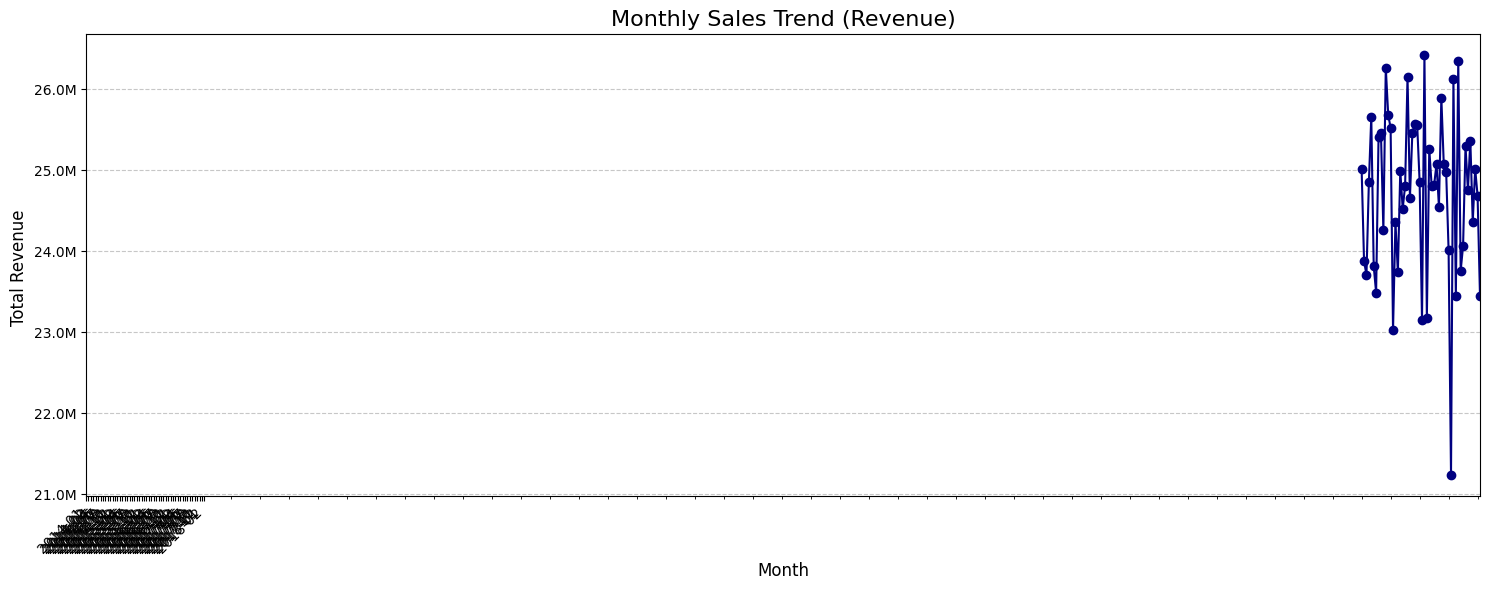

In [115]:
# import pandas as pd
# import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- 1. Create the temporary DataFrame (df_temp) ---

# Extract only the necessary columns from the main df
df_temp = df[["order_date", "revenue"]].copy()

# Add the new 'Order_month' column to df_temp
# Note: Use .dt.to_period('M') for correct time grouping
df_temp['Order_month'] = df_temp['order_date'].dt.to_period('M')

print(df_temp)

# --- 2. Calculate Monthly Sales Series ---

# Group the temporary DataFrame by 'Order_month' and sum the 'Revenue'
monthly_sales = df_temp.groupby('Order_month')['revenue'].sum()


print(monthly_sales)
# --- 3. Plot the Graph ---

plt.figure(figsize=(15, 6))

# Plot the monthly sales data
monthly_sales.plot(kind='line', marker='o', color='navy')

# Formatting the Y-axis to show values in Millions (M)
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Set labels and title
plt.title('Monthly Sales Trend (Revenue)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ', fontsize=12)

# Set correct tick labels and rotate for readability
plt.xticks(
    ticks=range(len(monthly_sales.index)),
    labels=[str(m) for m in monthly_sales.index],
    rotation=45,
    ha='right'
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('monthly_sales_trend.png') # Save the plot
plt.show()

# --- 4. Delete Temporary Objects (Cleanup) ---

# Explicitly delete the temporary DataFrame and Series to free up memory
del df_temp
del monthly_sales

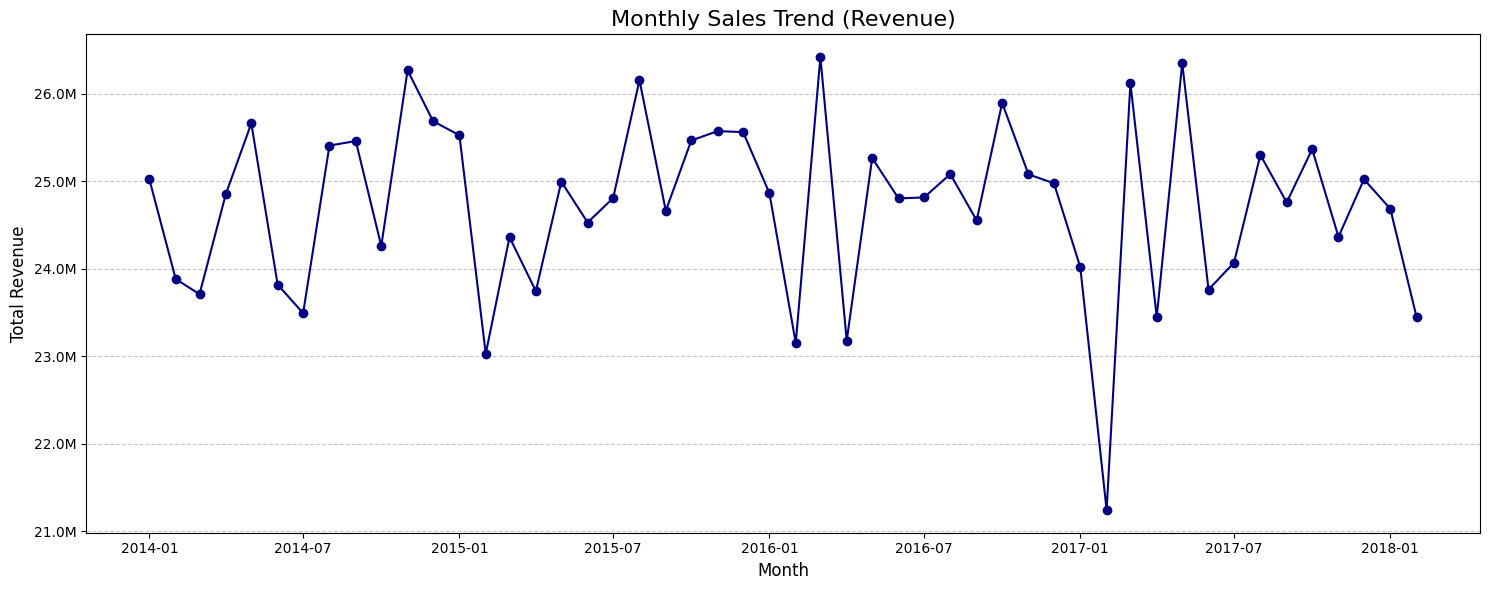

In [116]:
df_temp = df[["order_date", "revenue"]].copy()
df_temp['Order_month'] = df_temp['order_date'].dt.to_period('M')
monthly_sales = df_temp.groupby('Order_month')['revenue'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()  # Fix index

plt.figure(figsize=(15, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='navy')

formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend (Revenue)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('monthly_sales_trend.png')
plt.show()

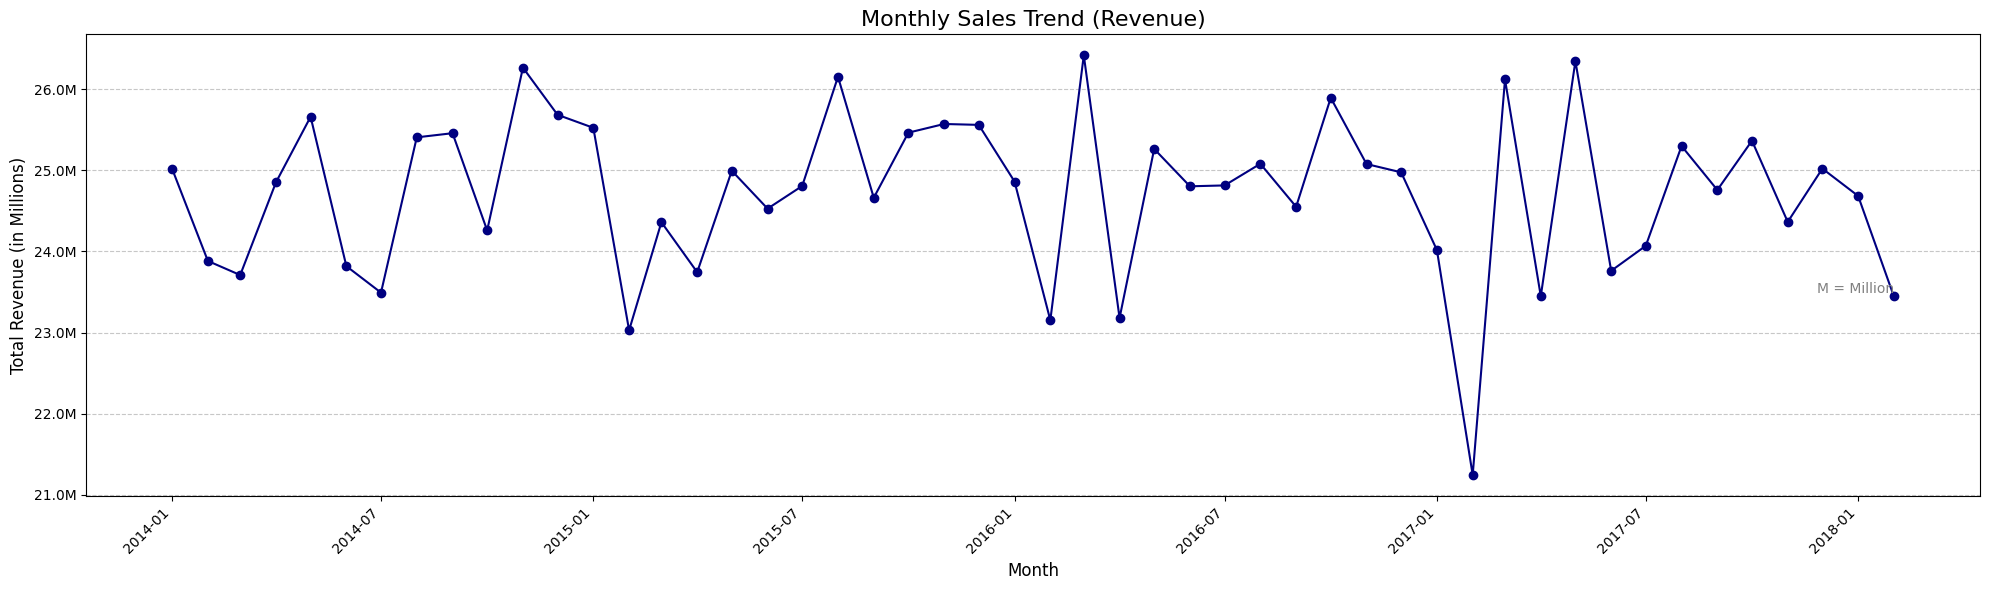

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- 1. Prepare Data ---
df_temp = df[["order_date", "revenue"]].copy()
df_temp['Order_month'] = df_temp['order_date'].dt.to_period('M')
monthly_sales = df_temp.groupby('Order_month')['revenue'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()  # Convert PeriodIndex to datetime

# --- 2. Plot ---
plt.figure(figsize=(20, 6))  # Wider figure to reduce overlap
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='navy')

# Format Y-axis to show values in Millions (M)
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add annotation to explain 'M'
plt.text(
    monthly_sales.index[-1], monthly_sales.values[-1],
    'M = Million', fontsize=10, ha='right', va='bottom', color='gray'
)

# Labels and title
plt.title('Monthly Sales Trend (Revenue)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (in Millions)', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 3. Cleanup ---
del df_temp
del monthly_sales

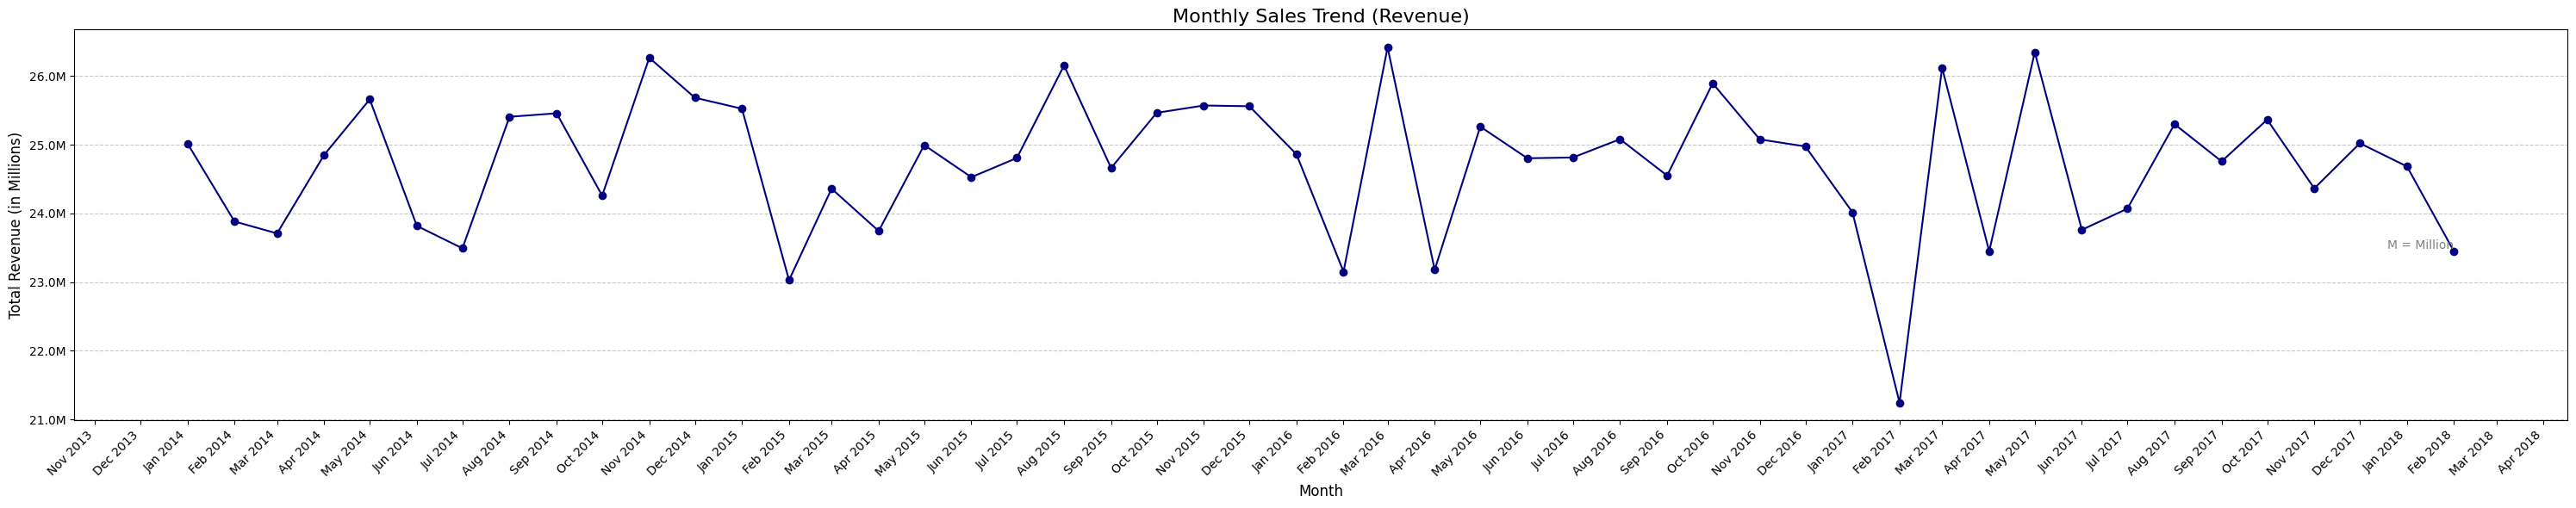

In [118]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# --- 1. Prepare Data ---
df_temp = df[["order_date", "revenue"]].copy()
df_temp['Order_month'] = df_temp['order_date'].dt.to_period('M')
monthly_sales = df_temp.groupby('Order_month')['revenue'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()  # Convert PeriodIndex to datetime

# --- 2. Plot ---
plt.figure(figsize=(30, 6))  # Extra wide figure to fit all months
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='navy')

# Format Y-axis to show values in Millions (M)
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Force x-axis to show every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g., Jan 2023

# Add annotation to explain 'M'
plt.text(
    monthly_sales.index[-1], monthly_sales.values[-1],
    'M = Million', fontsize=10, ha='right', va='bottom', color='gray'
)

# Labels and title
plt.title('Monthly Sales Trend (Revenue)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (in Millions)', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 3. Cleanup ---
del df_temp
del monthly_sales

Here’s a clear, insight-focused interpretation of the sales trend plot you shared:

---

## **📌 Key Conclusions from the Monthly Sales Trend Plot**

### **1. Revenue remains relatively stable overall**

Across the entire period (2013–2018), total monthly revenue stays mostly between **$23M and $26M**, indicating a **consistent performance with no long-term decline or growth trend**.

---

## **2. Regular seasonal fluctuations are visible**

The plot shows repeating up-and-down cycles every year.
Typical pattern:

* **Peaks around Nov–Jan**
* **Dips around Feb–Mar**

This suggests **seasonality in customer demand**, possibly driven by:

* Holidays
* Year-end promotions
* Post-holiday drop in sales

---

## **3. Some months show stronger peaks**

There are noticeable high points around:

* **May 2014**
* **Aug–Sep 2015**
* **Apr 2016**
* **Apr 2017**

These spikes could indicate:

* Product launches
* Marketing campaigns
* Increased seasonal demand

---

## **4. A few sharp declines occur**

Certain months drop well below the trend line (e.g., **Feb 2017** shows a significant dip even below $22M**).
Possible explanations:

* External market factors
* Supply chain issues
* Seasonal slowdown

These dips look *out-of-pattern*, so they may require deeper investigation.

---

## **5. No strong upward or downward long-term trend**

Even over 4+ years, the plot does **not** show a steady increase or decrease in revenue.
This indicates:

* Mature, stable market
* Revenue driven more by **cyclical factors** than long-term growth

---

## **6. Revenue clustering around $24M–$25.5M**

The majority of points fall here.
This zone appears to be the **normal operating range**.

---

## **7. Occasional volatility**

While the average is stable, month-to-month swings (especially the peaks and troughs) show **moderate volatility**, hinting that:

* Demand forecasting needs to be seasonally adjusted
* Inventory planning must consider these fluctuations

---

## **📊 Strategic Interpretation**

If this were real business data, the implications would be:

### **Short-term actions**

* Strengthen marketing campaigns during seasonal upswings (Nov–Jan).
* Investigate reasons for sharp dips like Feb 2017.

### **Long-term actions**

* Explore opportunities to break out of the flat trend and create sustained growth.
* Analyze which campaigns or events caused spikes to replicate success.

---


Based on the "Monthly Sales Trend (Revenue)" chart provided, here is a detailed analysis of the performance, trends, and anomalies observed from January 2014 through February 2018.

### 1. High-Level Overview
* **Time Period:** The data covers approximately 4 years (Jan 2014 – Feb 2018).
* **Revenue Range:** Monthly revenue mostly fluctuates between **23 Million** and **26.5 Million**, with a few exceptions.
* **General Trend:** The overall trend is **lateral (flat)**. There is no consistent long-term upward or downward trajectory. Instead, the revenue oscillates within a specific band, suggesting a mature business or a stable market share.

### 2. Seasonality and Cyclical Patterns
The most distinct feature of this chart is the recurring volatility in the first quarter (Q1) of each year.

* **The "February Drop":** There is a consistent pattern of revenue declining in February.
    * **Feb 2015:** Drops to ~23.0M.
    * **Feb 2016:** Drops to ~23.1M.
    * **Feb 2017:** A massive crash to the all-time low of ~21.2M.
    * *Insight:* February appears to be a seasonally weak month for this business, potentially due to fewer days in the month, post-holiday spending fatigue, or industry-specific cycles.

* **The "March Recovery":** In almost every instance following the February drop, there is a sharp recovery in March.
    * **Mar 2016:** Revenue spikes to an all-time high (~26.5M) immediately after the Feb dip.
    * **Mar 2017:** Revenue rockets back up to ~26.1M immediately after the all-time low.

### 3. Key Anomalies and Outliers
* **The All-Time Low (Feb 2017):**
    The drop in February 2017 is significantly deeper than previous years. While a dip is expected in February, falling to **21.2M** breaks the established support level of 23M.
    * *Hypothesis:* This suggests an external event occurred (e.g., supply chain disruption, severe weather event, website outage) or a failed marketing campaign, rather than just normal seasonality.

* **The Ceiling (Resistance Level):**
    The company struggles to break past the **26.5M** revenue mark.
    * Peaks occurred in Dec 2014, Aug 2015, Mar 2016, and May 2017, but revenue consistently retraces after hitting this ceiling. This indicates a market saturation point or a limit in production/service capacity.

### 4. Year-over-Year (YoY) Observations
* **2014:** Showed the most consistent growth, starting around 25M and ending the year near 26.3M.
* **2015:** Highly volatile. Started high, dipped low in Q1, recovered in summer, and stayed relatively flat in Q4.
* **2016:** Started with a dip, hit a record high in March, but then saw a slow, grinding decline throughout the second half of the year.
* **2017:** Extreme volatility. The year had the lowest low (Feb) and one of the highest highs (May), indicating an unstable operating environment that year.

### 5. Strategic Implications
* **Investigate February:** Management needs to analyze why February is consistently weak. If it is due to fewer calendar days, can daily sales volume be increased? If it is demand-based, can a "Valentine's" or "End of Winter" promotion smooth out this dip?
* **Capacity Planning:** Since revenue consistently caps out at ~26.5M, the business may need to innovate, expand product lines, or enter new markets to break through this revenue ceiling.
* **Stabilization:** 2017 was far more erratic than 2014. The goal for 2018 should be stabilizing the variance to make cash flow more predictable.

### Summary
The business generates significant revenue (averaging ~$24.5M/month) but is currently stagnant in terms of growth. It suffers from severe seasonal volatility in Q1 (specifically February) but consistently demonstrates resilience by bouncing back immediately in March.

***

**Would you like me to create a Python script to extract these approximate data points so you can perform further forecasting?**

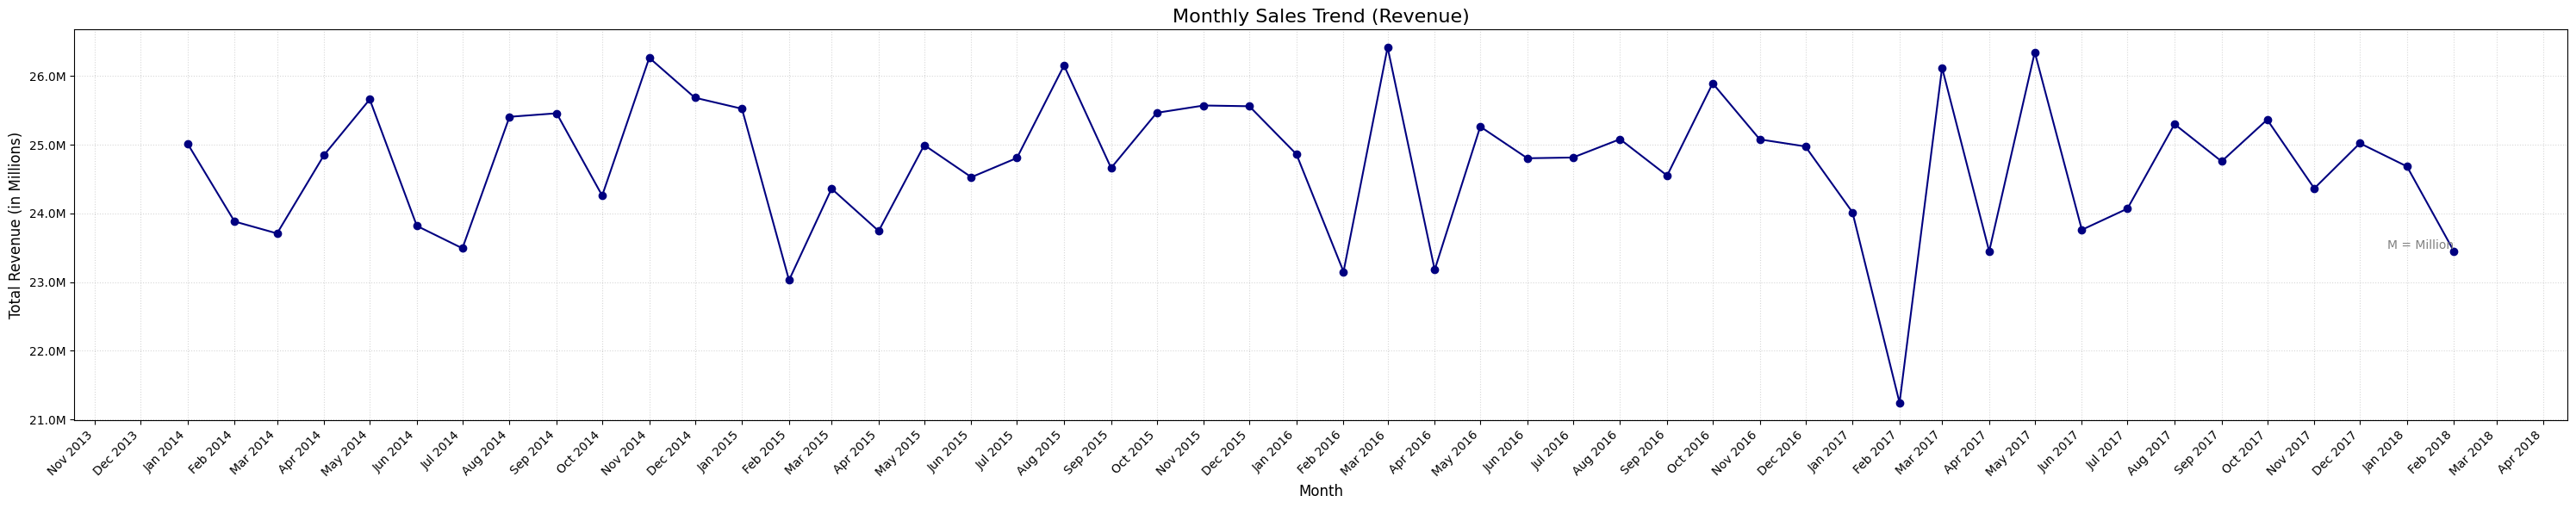

In [119]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# --- 1. Prepare Data (Assumes df is already loaded) ---
# Ensure your df is loaded before running this
df_temp = df[["order_date", "revenue"]].copy()
df_temp['Order_month'] = df_temp['order_date'].dt.to_period('M')
monthly_sales = df_temp.groupby('Order_month')['revenue'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()  # Convert PeriodIndex to datetime

# --- 2. Plot ---
plt.figure(figsize=(30, 6))  # Extra wide figure to fit all months
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='navy')

# Format Y-axis to show values in Millions (M)
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Force x-axis to show every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 

# Add annotation to explain 'M'
plt.text(
    monthly_sales.index[-1], monthly_sales.values[-1],
    'M = Million', fontsize=10, ha='right', va='bottom', color='gray'
)

# Labels and title
plt.title('Monthly Sales Trend (Revenue)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (in Millions)', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# --- MODIFIED SECTION: Add Grid Lines for Both Axes ---
# axis='both' (default) adds lines for X and Y. 
# alpha=0.5 makes them slightly lighter so they don't distract from the data.
plt.grid(True, which='major', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

# --- 3. Cleanup ---
del df_temp
del monthly_sales

In [120]:
df.columns

Index(['order_number', 'order_date', 'sales_channel', 'currency_code',
       'warehouse_code', 'order_quantity', 'unit_price', 'revenue',
       'total_unit_cost', 'customer_name', 'product_name', 'region_name',
       'county', 'state', 'region_type', 'latitude', 'longitude', 'area_code',
       'region_population', 'region_households', 'region_median_income',
       'land_area', 'water_area', 'time_zone', 'region', 'budget_2017',
       'profit'],
      dtype='object')

In [121]:
df_temp = df[['order_date','revenue']]

# df['month_name'] = df['order_date'].dt.month_name()

df_temp['month_name'] = df['order_date'].dt.month_name()
monthly_sales = df_temp.groupby('month_name')['revenue'].sum()

print(df_temp)
print(monthly_sales)




      order_date  revenue month_name
0     2014-01-01  14994.6    January
1     2014-01-01  25868.7    January
2     2014-01-01   5869.2    January
3     2014-01-01  16368.1    January
4     2014-01-01  18331.2    January
...          ...      ...        ...
64099 2018-02-28  21788.4   February
64100 2018-02-28   5185.8   February
64101 2018-02-28  43483.0   February
64102 2018-02-28  27717.9   February
64103 2018-02-28   7986.4   February

[64104 rows x 3 columns]
month_name
April         95224755.0
August       101947025.8
December     101247927.7
February     114747751.0
January      124111403.0
July          97185201.8
June          96912692.7
March        100613652.1
May          102272116.5
November     101285199.8
October      100988872.2
September     99432301.4
Name: revenue, dtype: float64


C:\Users\arkog\AppData\Local\Temp\ipykernel_6484\4255221625.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['month_name'] = df['order_date'].dt.month_name()


Ah, that **`SettingWithCopyWarning`** is a classic pandas gotcha ⚡. It happens because you created `df_temp` as a **slice of `df`**, and then tried to assign a new column to it. Pandas is warning that this may not behave as expected (sometimes it modifies the original `df`, sometimes not).

---

## 🔍 Why the Warning Appears
```python
df_temp = df[["order_date", "revenue"]].copy()
df_temp['month_name'] = df['order_date'].dt.month_name()
```

- `df_temp` is a copy of part of `df`.
- But when you assign `df['order_date'].dt.month_name()` into `df_temp`, pandas thinks you might be mixing references between the original and the copy.
- That’s why it warns you.

---

## ✅ Correct Ways to Fix It

### 1. Assign from `df_temp` itself (preferred)
```python
df_temp['month_name'] = df_temp['order_date'].dt.month_name()
```
👉 This avoids referencing the original `df` and keeps everything clean.

---

### 2. Use `.loc` explicitly
```python
df_temp.loc[:, 'month_name'] = df_temp['order_date'].dt.month_name()
```
👉 This makes it clear you’re assigning to a column in `df_temp`.

---

### 3. If you really want to use `df`
If for some reason you want to pull from the original `df`, make sure you copy the result:
```python
df_temp['month_name'] = df['order_date'].dt.month_name().copy()
```

---

## 🎯 Best Practice for You
Since you’re building reusable workflows, Arkojyoti, always reference the **same DataFrame** when adding new columns. So stick with:

```python
df_temp['month_name'] = df_temp['order_date'].dt.month_name()
```

That will silence the warning and keep your code predictable.

---

Would you like me to also show you how to **safely add multiple derived columns at once** (like `month_num`, `month_name`, `year`) without triggering warnings? That’s often useful in time-series analysis.


In [122]:
df_temp = df[['order_date','revenue']].copy()

# df['month_name'] = df['order_date'].dt.month_name()

df_temp['month_name'] = df['order_date'].dt.month_name()
monthly_sales = df_temp.groupby('month_name')['revenue'].sum()

print(df_temp)
print(monthly_sales)




      order_date  revenue month_name
0     2014-01-01  14994.6    January
1     2014-01-01  25868.7    January
2     2014-01-01   5869.2    January
3     2014-01-01  16368.1    January
4     2014-01-01  18331.2    January
...          ...      ...        ...
64099 2018-02-28  21788.4   February
64100 2018-02-28   5185.8   February
64101 2018-02-28  43483.0   February
64102 2018-02-28  27717.9   February
64103 2018-02-28   7986.4   February

[64104 rows x 3 columns]
month_name
April         95224755.0
August       101947025.8
December     101247927.7
February     114747751.0
January      124111403.0
July          97185201.8
June          96912692.7
March        100613652.1
May          102272116.5
November     101285199.8
October      100988872.2
September     99432301.4
Name: revenue, dtype: float64


In [123]:
df_temp = df[['order_date','revenue']].copy()

# df['month_name'] = df['order_date'].dt.month_name()

df_temp['month_name'] = df['order_date'].dt.month_name()
monthly_sales = df_temp.groupby('month_name')['revenue'].sum()

print(df_temp)
print(monthly_sales)



month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

monthly_sales = monthly_sales.reindex(month_order)

      order_date  revenue month_name
0     2014-01-01  14994.6    January
1     2014-01-01  25868.7    January
2     2014-01-01   5869.2    January
3     2014-01-01  16368.1    January
4     2014-01-01  18331.2    January
...          ...      ...        ...
64099 2018-02-28  21788.4   February
64100 2018-02-28   5185.8   February
64101 2018-02-28  43483.0   February
64102 2018-02-28  27717.9   February
64103 2018-02-28   7986.4   February

[64104 rows x 3 columns]
month_name
April         95224755.0
August       101947025.8
December     101247927.7
February     114747751.0
January      124111403.0
July          97185201.8
June          96912692.7
March        100613652.1
May          102272116.5
November     101285199.8
October      100988872.2
September     99432301.4
Name: revenue, dtype: float64


      order_date  revenue month_name
0     2014-01-01  14994.6    January
1     2014-01-01  25868.7    January
2     2014-01-01   5869.2    January
3     2014-01-01  16368.1    January
4     2014-01-01  18331.2    January
...          ...      ...        ...
64099 2018-02-28  21788.4   February
64100 2018-02-28   5185.8   February
64101 2018-02-28  43483.0   February
64102 2018-02-28  27717.9   February
64103 2018-02-28   7986.4   February

[64104 rows x 3 columns]
month_name
April         95224755.0
August       101947025.8
December     101247927.7
February     114747751.0
January      124111403.0
July          97185201.8
June          96912692.7
March        100613652.1
May          102272116.5
November     101285199.8
October      100988872.2
September     99432301.4
Name: revenue, dtype: float64


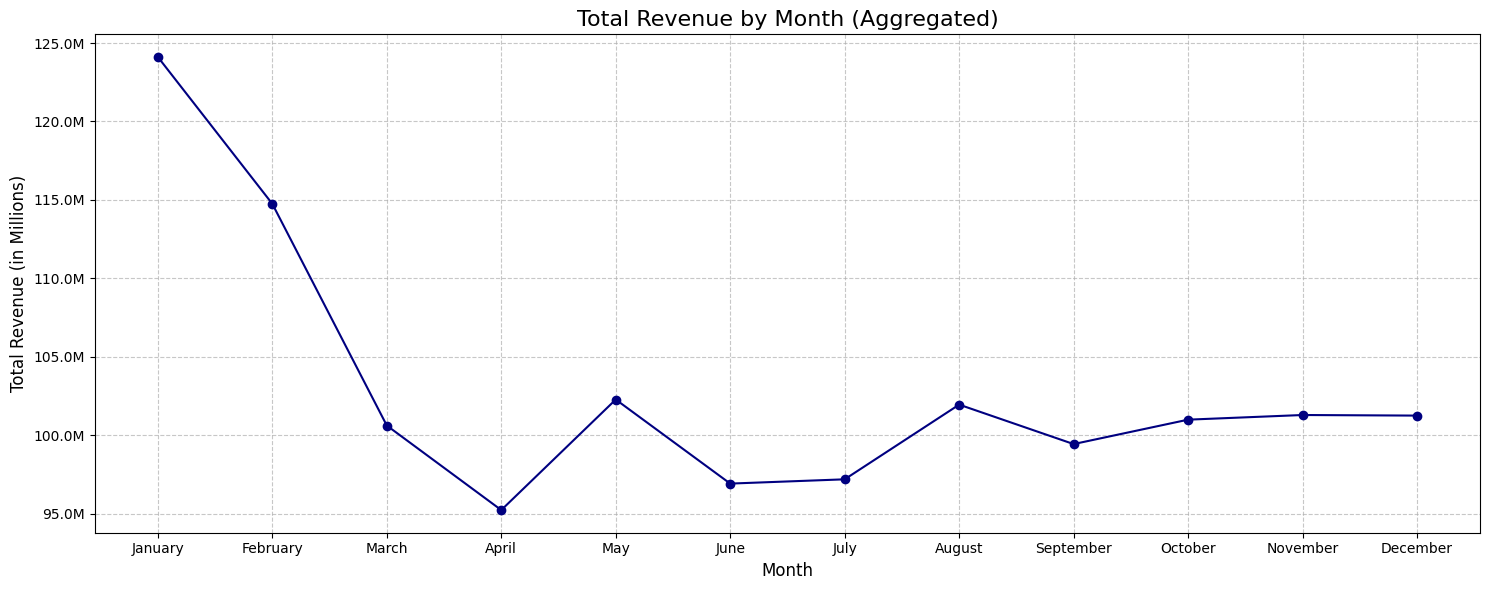

In [124]:

df_temp = df[['order_date','revenue']].copy()

# df['month_name'] = df['order_date'].dt.month_name()

df_temp['month_name'] = df['order_date'].dt.month_name()
monthly_sales = df_temp.groupby('month_name')['revenue'].sum()

print(df_temp)
print(monthly_sales)



month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

monthly_sales = monthly_sales.reindex(month_order)
# import matplotlib.pyplot as plt
# from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(15,6))  # wide enough to avoid overlap

plt.plot(month_order, monthly_sales.values, marker='o', color='navy')

# Format Y-axis in millions
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Total Revenue by Month (Aggregated)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue (in Millions)", fontsize=12)

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

year
2014    297520729.3
2015    298410710.4
2016    298083670.0
2017    293823836.8
2018     48129952.5
Name: revenue, dtype: float64


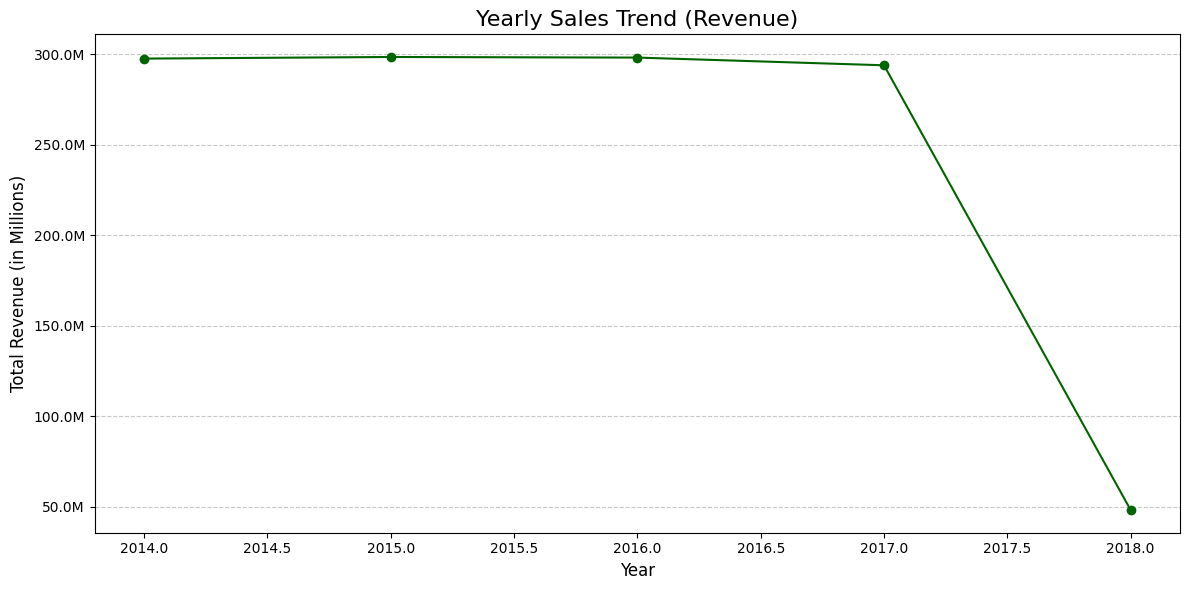

In [125]:
df_temp = df[['order_date','revenue']].copy()
df_temp['year'] = df_temp['order_date'].dt.year


yearly_sales = df_temp.groupby('year')['revenue'].sum()
print(yearly_sales)


import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12,6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='darkgreen')

# Format Y-axis to show values in Millions (M)
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Yearly Sales Trend (Revenue)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Revenue (in Millions)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\arkog\AppData\Local\Temp\ipykernel_6484\4210263412.py:42: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\arkog\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


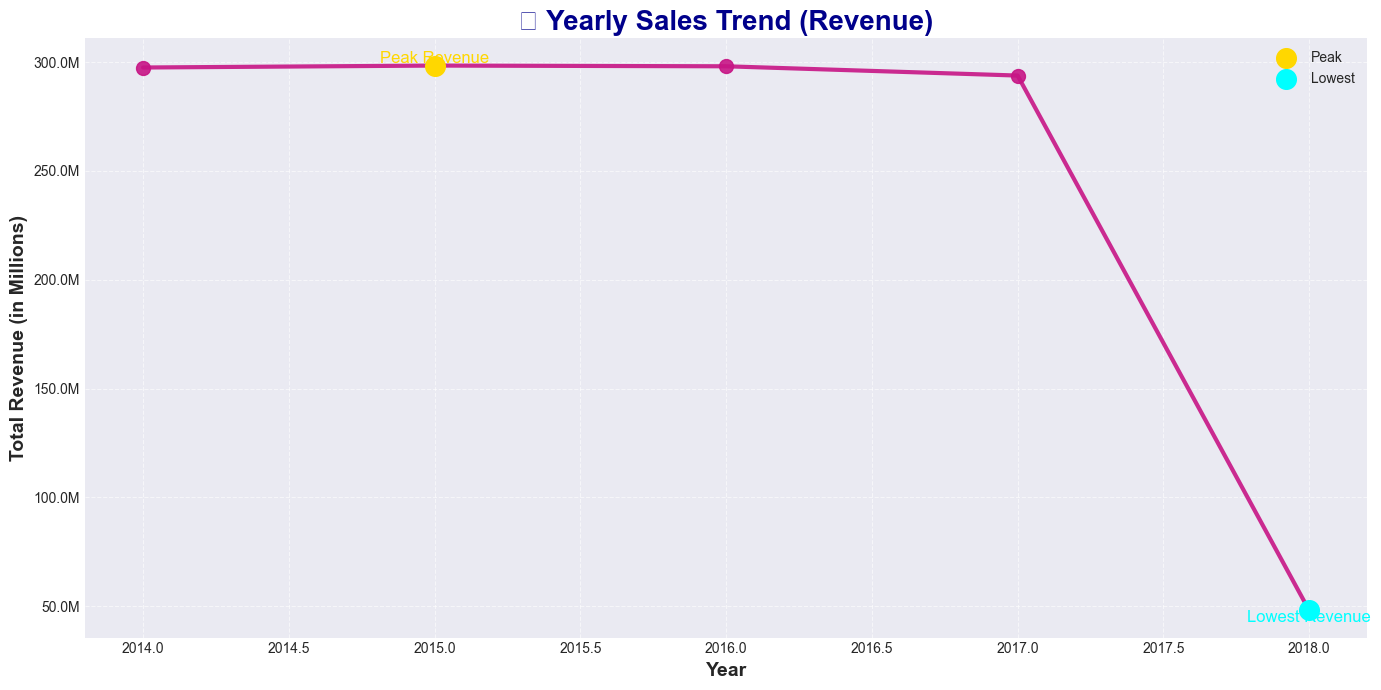

In [126]:
# import matplotlib.pyplot as plt
# from matplotlib.ticker import FuncFormatter

# --- 1. Prepare Data ---
df_temp = df[['order_date','revenue']].copy()
df_temp['year'] = df_temp['order_date'].dt.year
yearly_sales = df_temp.groupby('year')['revenue'].sum()

# --- 2. Plot with Style ---
plt.style.use('seaborn-v0_8-darkgrid')  # modern background

fig, ax = plt.subplots(figsize=(14,7))

# Smooth line with markers
ax.plot(yearly_sales.index, yearly_sales.values,
        marker='o', markersize=10, linewidth=3,
        color='mediumvioletred', alpha=0.9)

# Highlight max and min points
max_year = yearly_sales.idxmax()
min_year = yearly_sales.idxmin()
ax.scatter([max_year], [yearly_sales.max()], color='gold', s=200, zorder=5, label='Peak')
ax.scatter([min_year], [yearly_sales.min()], color='cyan', s=200, zorder=5, label='Lowest')

# Format Y-axis in Millions
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
ax.yaxis.set_major_formatter(formatter)

# Titles and labels with sexy fonts
ax.set_title("🔥 Yearly Sales Trend (Revenue)", fontsize=20, fontweight='bold', color='darkblue')
ax.set_xlabel("Year", fontsize=14, fontweight='bold')
ax.set_ylabel("Total Revenue (in Millions)", fontsize=14, fontweight='bold')

# Add annotation for clarity
ax.text(max_year, yearly_sales.max(), "Peak Revenue", fontsize=12, color='gold', ha='center', va='bottom')
ax.text(min_year, yearly_sales.min(), "Lowest Revenue", fontsize=12, color='cyan', ha='center', va='top')

# Legend and grid
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [127]:
# excluding 2018 months as they are  only for jan and feb and that can give bad graph for analyis

      order_date  revenue month_name
0     2014-01-01  14994.6    January
1     2014-01-01  25868.7    January
2     2014-01-01   5869.2    January
3     2014-01-01  16368.1    January
4     2014-01-01  18331.2    January
...          ...      ...        ...
61621 2017-12-31   8864.1   December
61622 2017-12-31   2412.0   December
61623 2017-12-31  34431.3   December
61624 2017-12-31   9179.0   December
61625 2017-12-31   1661.6   December

[61626 rows x 3 columns]
month_name
April         95224755.0
August       101947025.8
December     101247927.7
February      91302983.7
January       99426217.8
July          97185201.8
June          96912692.7
March        100613652.1
May          102272116.5
November     101285199.8
October      100988872.2
September     99432301.4
Name: revenue, dtype: float64


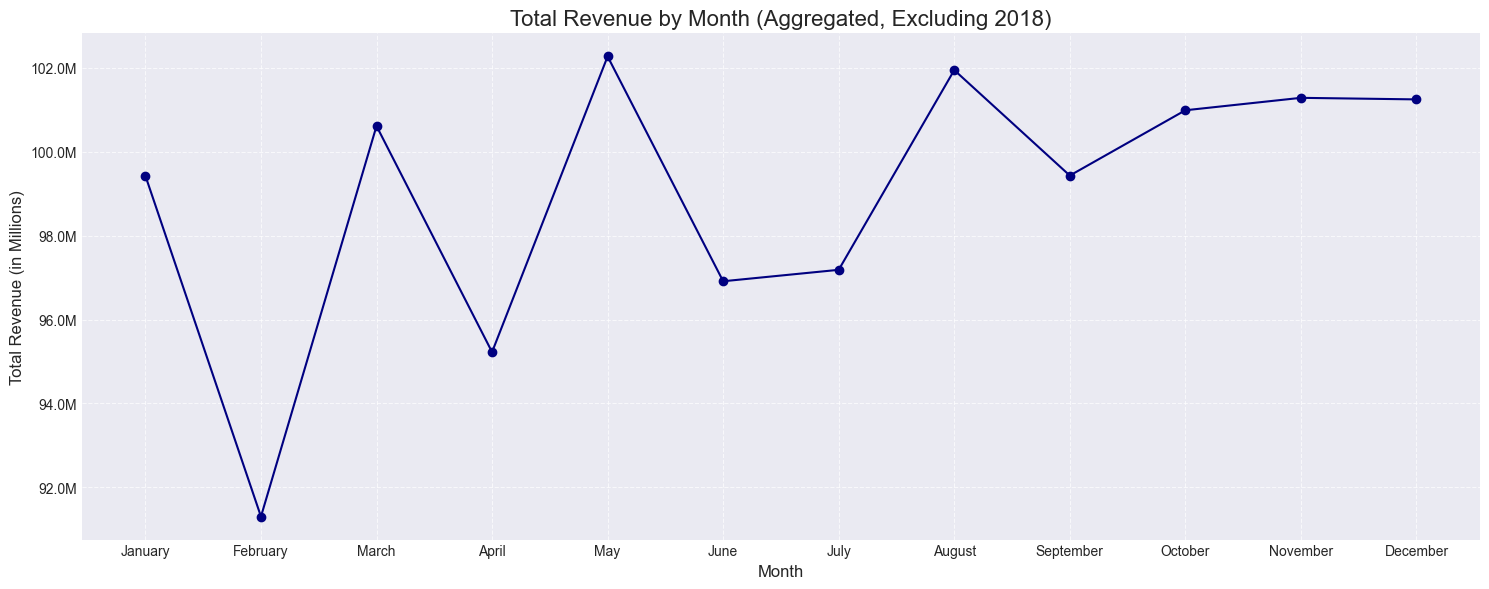

In [128]:
df_temp = df[['order_date','revenue']].copy()

# Exclude rows where year is 2018
df_temp = df_temp[df_temp['order_date'].dt.year != 2018]

# Add month name column
df_temp['month_name'] = df_temp['order_date'].dt.month_name()

# Group by month name
monthly_sales = df_temp.groupby('month_name')['revenue'].sum()

print(df_temp)
print(monthly_sales)

month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

monthly_sales = monthly_sales.reindex(month_order)

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(15,6))  # wide enough to avoid overlap

plt.plot(month_order, monthly_sales.values, marker='o', color='navy')

# Format Y-axis in millions
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Total Revenue by Month (Aggregated, Excluding 2018)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue (in Millions)", fontsize=12)

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [129]:
# df_temp.to_csv("sample.csv",index=False)

In [130]:
df

,order_number,order_date,sales_channel,currency_code,warehouse_code,order_quantity,unit_price,revenue,total_unit_cost,customer_name,product_name,region_name,county,state,region_type,latitude,longitude,area_code,region_population,region_households,region_median_income,land_area,water_area,time_zone,region,budget_2017,profit
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,NaN,4048.542
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,NaN,11899.602
2,SO - 0005126,2014-01-01,Wholesale,USD,AXW291,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Pleasanton,Alameda County,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,NaN,1760.760
3,SO - 0005614,2014-01-01,Export,USD,AXW291,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Bloomington,Monroe County,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,NaN,9166.136
4,SO - 0005781,2014-01-01,Wholesale,USD,AXW291,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Manchester,Hartford County,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,NaN,8249.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Wholesale,USD,AXW291,12,1815.7,21788.4,980.478,Dazzlesphe Corp,Product 26,Levittown,Bucks County,Pennsylvania,CDP,40.15511,-74.82877,445,51326,18095,69878,26311722,253129,America/New York,Northeast,NaN,10022.664
64100,SO - 0007706,2018-02-28,Export,USD,NXH382,6,864.3,5185.8,579.081,Yombu Corp,Product 21,Palatine,Cook County,Illinois,Village,42.11030,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago,Midwest,NaN,1711.314
64101,SO - 0007718,2018-02-28,Distributor,USD,AXW291,11,3953.0,43483.0,2648.510,Bath Group,Product 13,Margate,Broward County,Florida,City,26.24453,-80.20644,954,57234,20651,42786,22943340,594611,America/New York,South,NaN,14349.390
64102,SO - 0008084,2018-02-28,Distributor,USD,AXW291,7,3959.7,27717.9,2930.178,Linklinks Ltd,Product 20,Cheektowaga,Erie County,New York,Town,42.91002,-78.74182,716,87514,38912,48662,76228647,162756,America/New York,Northeast,NaN,7206.654


product_name
Product 26    117291821.4
Product 25    109473966.6
Product 13     78281379.6
Product 14     75390396.6
Product 5      70804380.6
Product 15     67331623.2
Product 2      57401097.6
Product 4      56701537.2
Product 1      55952289.6
Product 3      51764816.4
Name: revenue, dtype: float64


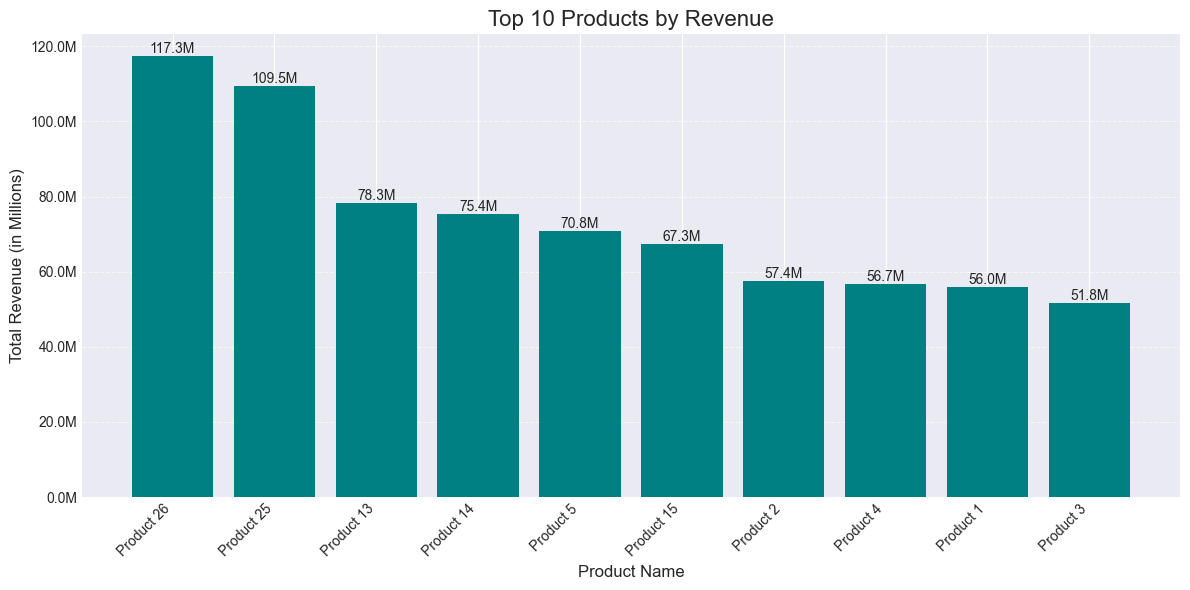

In [131]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.ticker import FuncFormatter

# Assuming df is already loaded
# Group by product_name and sum revenue
top_products = (
    df.groupby('product_name')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

print(top_products)

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(top_products.index, top_products.values, color='teal')

# Format Y-axis in millions
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Revenue (in Millions)", fontsize=12)

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval/1e6:.1f}M',
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

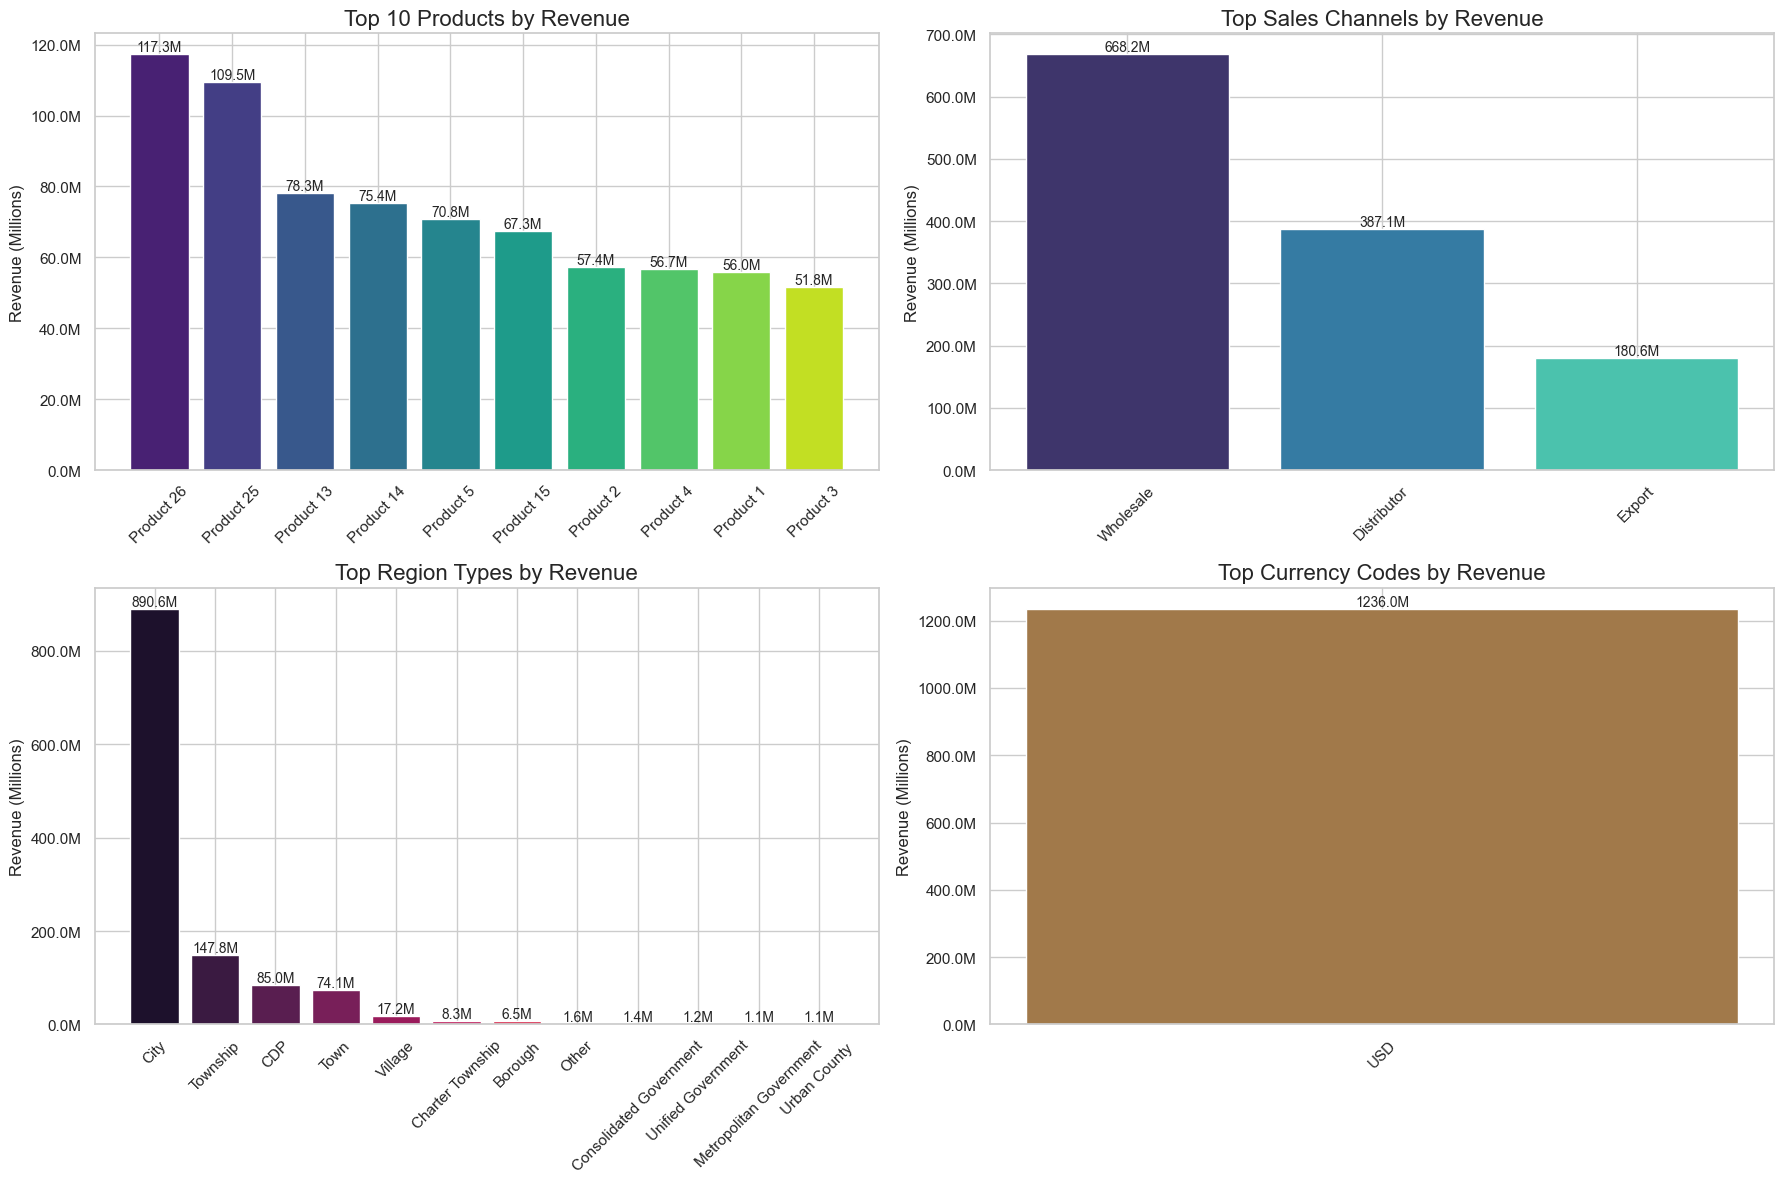

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Set a beautiful style
sns.set_theme(style="whitegrid")

# ---------- TOP 10 PRODUCTS ----------
top_products = (
    df.groupby('product_name')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

# ---------- TOP SALES CHANNEL ----------
top_channels = (
    df.groupby('sales_channel')['revenue']
      .sum()
      .sort_values(ascending=False)
)

# ---------- TOP REGION TYPE ----------
top_region_types = (
    df.groupby('region_type')['revenue']
      .sum()
      .sort_values(ascending=False)
)

# ---------- TOP CURRENCY CODE ----------
top_currency = (
    df.groupby('currency_code')['revenue']
      .sum()
      .sort_values(ascending=False)
)

# ---------- PLOTTING ----------
fig, axes = plt.subplots(2, 2, figsize=(18,12))
axes = axes.flatten()

# Formatter for millions
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')

# --- Products ---
bars = axes[0].bar(top_products.index, top_products.values, color=sns.color_palette("viridis", len(top_products)))
axes[0].set_title("Top 10 Products by Revenue", fontsize=16)
axes[0].set_ylabel("Revenue (Millions)", fontsize=12)
axes[0].yaxis.set_major_formatter(formatter)
axes[0].tick_params(axis='x', rotation=45)
for bar in bars:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval/1e6:.1f}M',
                 ha='center', va='bottom', fontsize=10)

# --- Sales Channels ---
bars = axes[1].bar(top_channels.index, top_channels.values, color=sns.color_palette("mako", len(top_channels)))
axes[1].set_title("Top Sales Channels by Revenue", fontsize=16)
axes[1].set_ylabel("Revenue (Millions)", fontsize=12)
axes[1].yaxis.set_major_formatter(formatter)
axes[1].tick_params(axis='x', rotation=45)
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval/1e6:.1f}M',
                 ha='center', va='bottom', fontsize=10)

# --- Region Types ---
bars = axes[2].bar(top_region_types.index, top_region_types.values, color=sns.color_palette("rocket", len(top_region_types)))
axes[2].set_title("Top Region Types by Revenue", fontsize=16)
axes[2].set_ylabel("Revenue (Millions)", fontsize=12)
axes[2].yaxis.set_major_formatter(formatter)
axes[2].tick_params(axis='x', rotation=45)
for bar in bars:
    yval = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2, yval, f'{yval/1e6:.1f}M',
                 ha='center', va='bottom', fontsize=10)

# --- Currency Codes ---
bars = axes[3].bar(top_currency.index, top_currency.values, color=sns.color_palette("cubehelix", len(top_currency)))
axes[3].set_title("Top Currency Codes by Revenue", fontsize=16)
axes[3].set_ylabel("Revenue (Millions)", fontsize=12)
axes[3].yaxis.set_major_formatter(formatter)
axes[3].tick_params(axis='x', rotation=45)
for bar in bars:
    yval = bar.get_height()
    axes[3].text(bar.get_x() + bar.get_width()/2, yval, f'{yval/1e6:.1f}M',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [133]:
for i in df.columns:
    if("pro" in i):
     print(i)

product_name
profit


In [134]:
print(df["region_type"].value_counts())
print(df["sales_channel"].value_counts())
print(len(df["product_name"].unique()))
df["product_name"].unique()


region_type
City                       46449
Township                    7610
CDP                         4340
Town                        3698
Village                      876
Charter Township             425
Borough                      345
Other                         90
Consolidated Government       78
Unified Government            66
Urban County                  64
Metropolitan Government       63
Name: count, dtype: int64
sales_channel
Wholesale      34596
Distributor    19968
Export          9540
Name: count, dtype: int64
30


array(['Product 27', 'Product 20', 'Product 26', 'Product 7', 'Product 8',
       'Product 23', 'Product 1', 'Product 25', 'Product 13',
       'Product 14', 'Product 4', 'Product 15', 'Product 3', 'Product 10',
       'Product 11', 'Product 5', 'Product 16', 'Product 19', 'Product 2',
       'Product 30', 'Product 18', 'Product 17', 'Product 21',
       'Product 12', 'Product 28', 'Product 22', 'Product 6',
       'Product 29', 'Product 24', 'Product 9'], dtype=object)

product_name
Product 24    14555053.2
Product 9     14598630.0
Product 29    15311014.2
Product 22    15638202.0
Product 7     17058267.0
Product 10    17660583.6
Product 27    18377791.8
Product 30    18590168.4
Product 23    18856855.2
Product 21    19246875.6
Name: revenue, dtype: float64


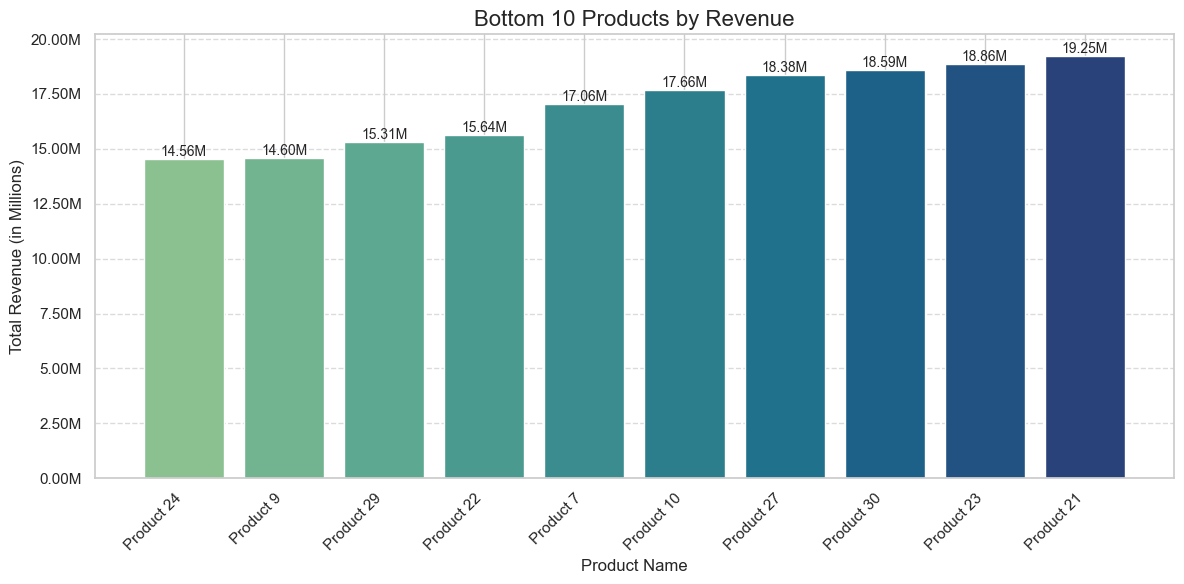

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Group by product_name and sum revenue
bottom_products = (
    df.groupby('product_name')['revenue']
      .sum()
      .sort_values(ascending=True)   # ascending = lowest first
      .head(10)                      # take bottom 10
)

print(bottom_products)

# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,6))
bars = plt.bar(bottom_products.index, bottom_products.values, color=sns.color_palette("crest", len(bottom_products)))

# Format Y-axis in millions
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.2f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Bottom 10 Products by Revenue", fontsize=16)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Revenue (in Millions)", fontsize=12)

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval/1e6:.2f}M',
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

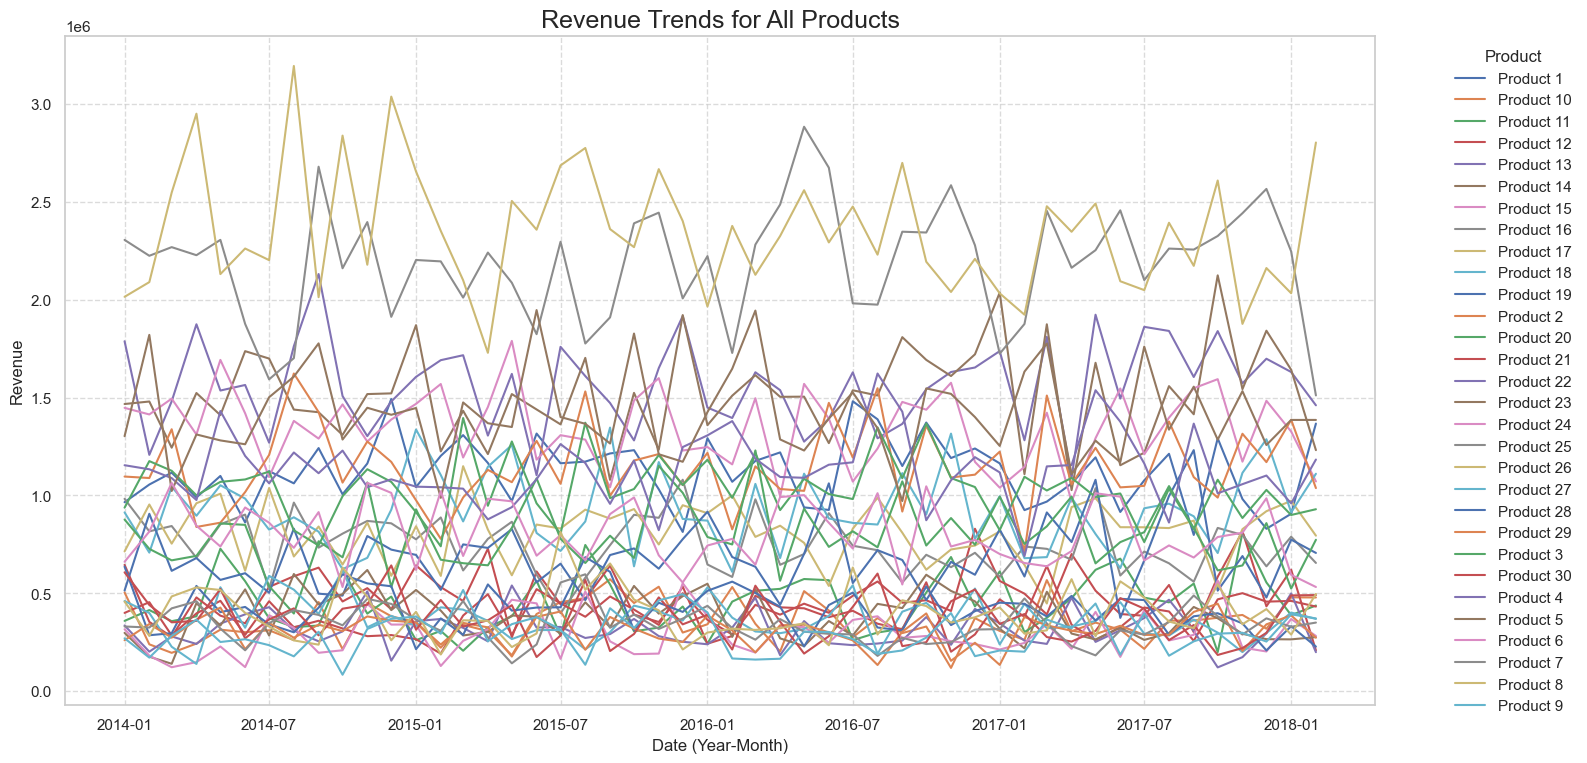

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Aggregate revenue by product and month (to smooth daily noise)
df['year_month'] = df['order_date'].dt.to_period('M').dt.to_timestamp()
product_trends = df.groupby(['year_month','product_name'])['revenue'].sum().reset_index()

# Pivot for line plotting
pivot_df = product_trends.pivot(index='year_month', columns='product_name', values='revenue')

# Plot
plt.figure(figsize=(16,8))
sns.set_theme(style="whitegrid")

for product in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[product], label=product)

plt.title("Revenue Trends for All Products", fontsize=18)
plt.xlabel("Date (Year-Month)", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

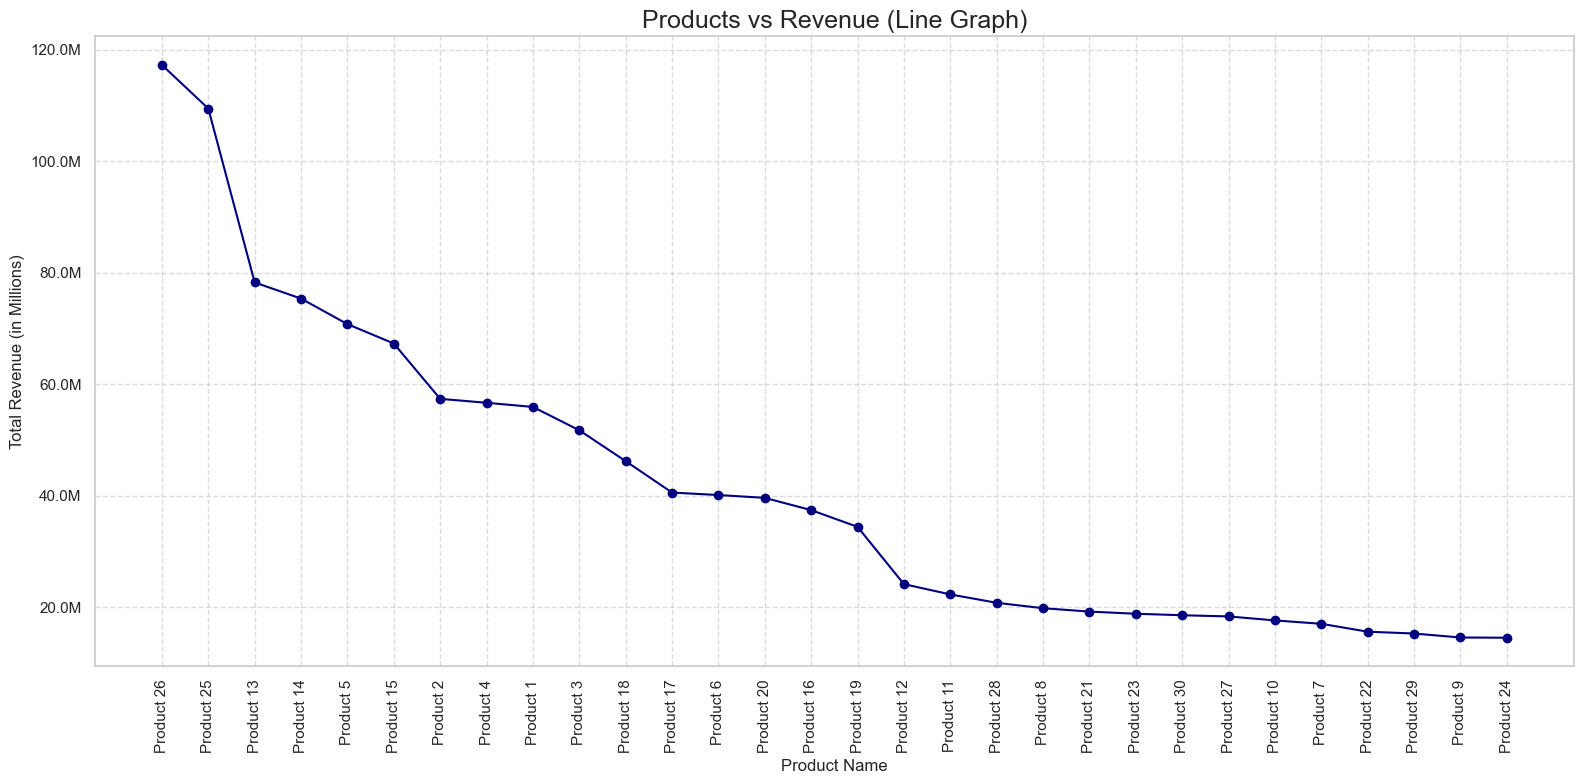

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Aggregate revenue by product
product_revenue = (
    df.groupby('product_name')['revenue']
      .sum()
      .sort_values(ascending=False)   # sort by revenue
)

# Plot line graph
plt.figure(figsize=(16,8))
sns.set_theme(style="whitegrid")

plt.plot(product_revenue.index, product_revenue.values, marker='o', color='navy')

# Format Y-axis in millions
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Products vs Revenue (Line Graph)", fontsize=18)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Revenue (in Millions)", fontsize=12)

# Rotate product names for readability
plt.xticks(rotation=90)

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

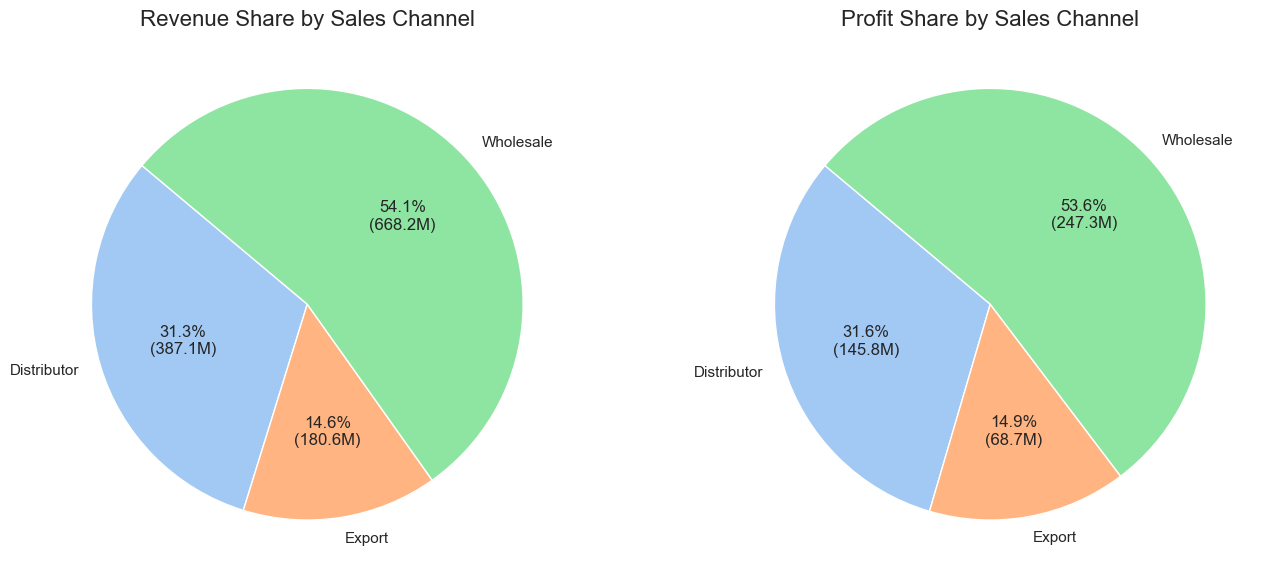

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate revenue and profit by sales_channel
channel_revenue = df.groupby('sales_channel')['revenue'].sum()
channel_profit  = df.groupby('sales_channel')['profit'].sum()

# Set style
sns.set_theme(style="whitegrid")
colors = sns.color_palette("pastel")

# --- Revenue Pie Chart ---
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.pie(channel_revenue, labels=channel_revenue.index,
        autopct=lambda p: f'{p:.1f}%\n({channel_revenue.sum()*p/100/1e6:.1f}M)',
        startangle=140, colors=colors, wedgeprops={'edgecolor':'white'})
plt.title("Revenue Share by Sales Channel", fontsize=16)

# --- Profit Pie Chart ---
plt.subplot(1,2,2)
plt.pie(channel_profit, labels=channel_profit.index,
        autopct=lambda p: f'{p:.1f}%\n({channel_profit.sum()*p/100/1e6:.1f}M)',
        startangle=140, colors=colors, wedgeprops={'edgecolor':'white'})
plt.title("Profit Share by Sales Channel", fontsize=16)

plt.tight_layout()
plt.show()

In [139]:
df['time_zone'].unique()

array(['America/New York', 'America/Indiana/Indianapolis',
       'America/Los Angeles', 'America/Chicago', 'America/Denver',
       'America/Detroit', 'America/Phoenix',
       'America/Kentucky/Louisville', 'America/Boise'], dtype=object)

In [140]:
df.head(2)

,order_number,order_date,sales_channel,currency_code,warehouse_code,order_quantity,unit_price,revenue,total_unit_cost,customer_name,product_name,region_name,county,state,region_type,latitude,longitude,area_code,region_population,region_households,region_median_income,land_area,water_area,time_zone,region,budget_2017,profit,year_month
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,NaN,4048.542,2014-01-01
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,NaN,11899.602,2014-01-01


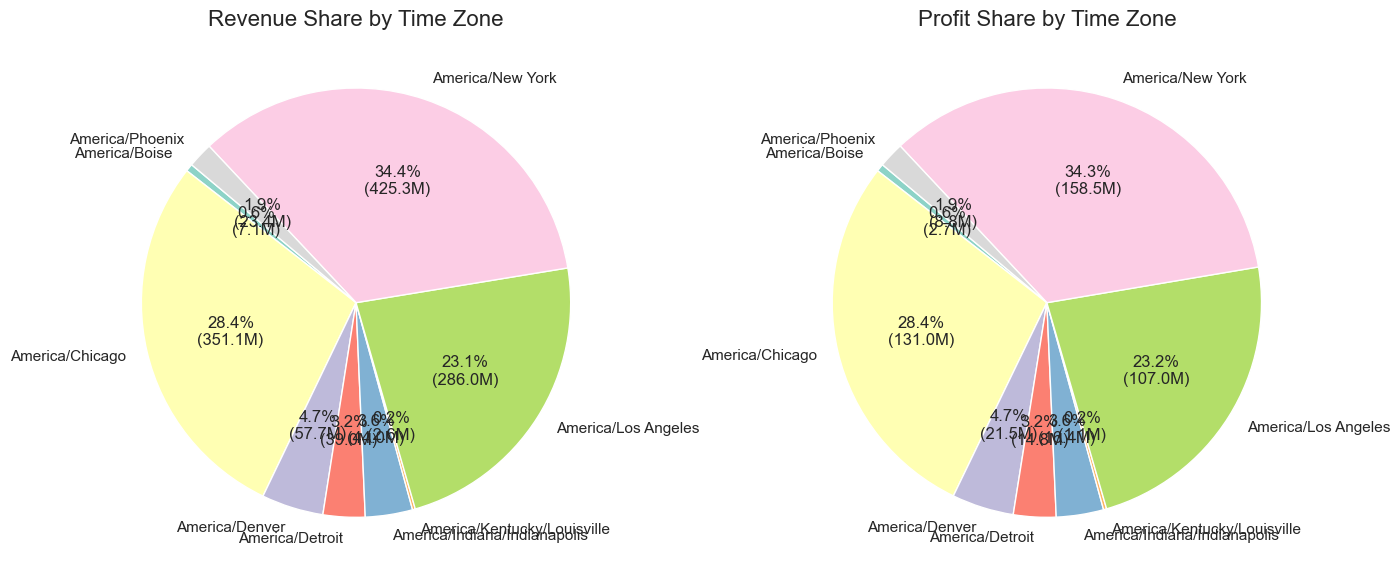

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate revenue and profit by time_zone
tz_revenue = df.groupby('time_zone')['revenue'].sum()
tz_profit  = df.groupby('time_zone')['profit'].sum()

# Set style
sns.set_theme(style="whitegrid")
colors = sns.color_palette("Set3")

# --- Revenue Pie Chart ---
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.pie(tz_revenue, labels=tz_revenue.index,
        autopct=lambda p: f'{p:.1f}%\n({tz_revenue.sum()*p/100/1e6:.1f}M)',
        startangle=140, colors=colors, wedgeprops={'edgecolor':'white'})
plt.title("Revenue Share by Time Zone", fontsize=16)

# --- Profit Pie Chart ---
plt.subplot(1,2,2)
plt.pie(tz_profit, labels=tz_profit.index,
        autopct=lambda p: f'{p:.1f}%\n({tz_profit.sum()*p/100/1e6:.1f}M)',
        startangle=140, colors=colors, wedgeprops={'edgecolor':'white'})
plt.title("Profit Share by Time Zone", fontsize=16)

plt.tight_layout()
plt.show()

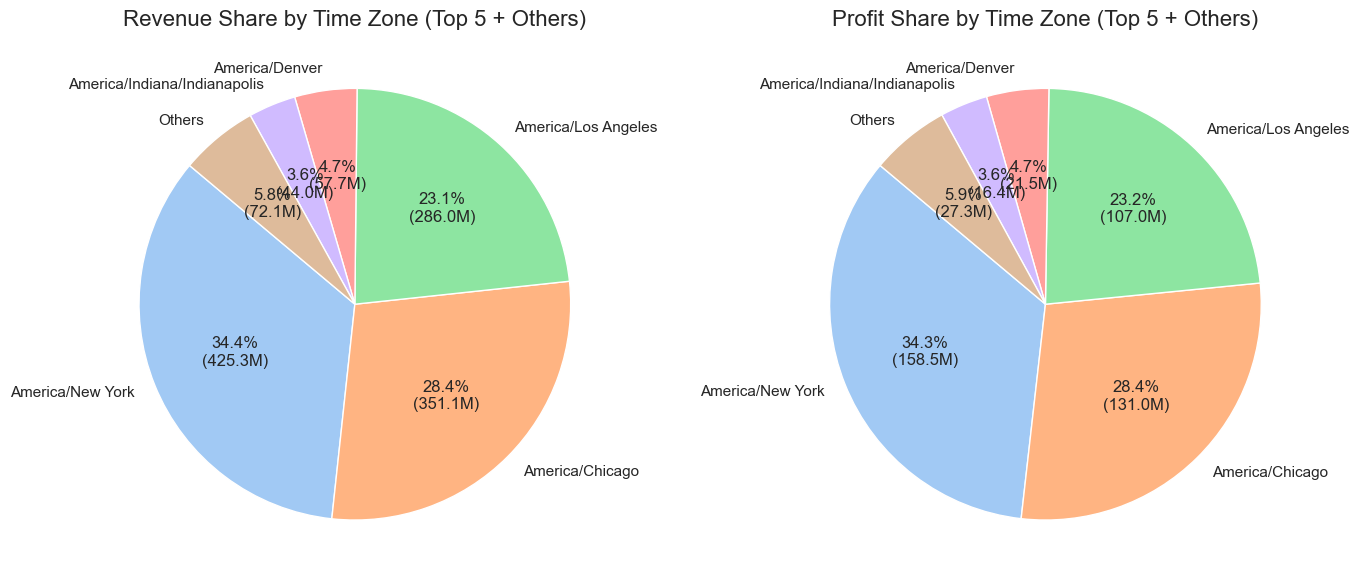

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate revenue and profit by time_zone
tz_revenue = df.groupby('time_zone')['revenue'].sum().sort_values(ascending=False)
tz_profit  = df.groupby('time_zone')['profit'].sum().sort_values(ascending=False)

# Function to keep top N and group rest as "Others"
def top_n_with_others(series, n=5):
    top = series.head(n)
    others = series.iloc[n:].sum()
    if others > 0:
        top["Others"] = others
    return top

# Apply function
tz_revenue_top = top_n_with_others(tz_revenue, n=5)
tz_profit_top  = top_n_with_others(tz_profit, n=5)

# Set style
sns.set_theme(style="whitegrid")
colors = sns.color_palette("pastel")

# --- Revenue Pie Chart ---
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.pie(tz_revenue_top, labels=tz_revenue_top.index,
        autopct=lambda p: f'{p:.1f}%\n({tz_revenue_top.sum()*p/100/1e6:.1f}M)',
        startangle=140, colors=colors, wedgeprops={'edgecolor':'white'})
plt.title("Revenue Share by Time Zone (Top 5 + Others)", fontsize=16)

# --- Profit Pie Chart ---
plt.subplot(1,2,2)
plt.pie(tz_profit_top, labels=tz_profit_top.index,
        autopct=lambda p: f'{p:.1f}%\n({tz_profit_top.sum()*p/100/1e6:.1f}M)',
        startangle=140, colors=colors, wedgeprops={'edgecolor':'white'})
plt.title("Profit Share by Time Zone (Top 5 + Others)", fontsize=16)

plt.tight_layout()
plt.show()

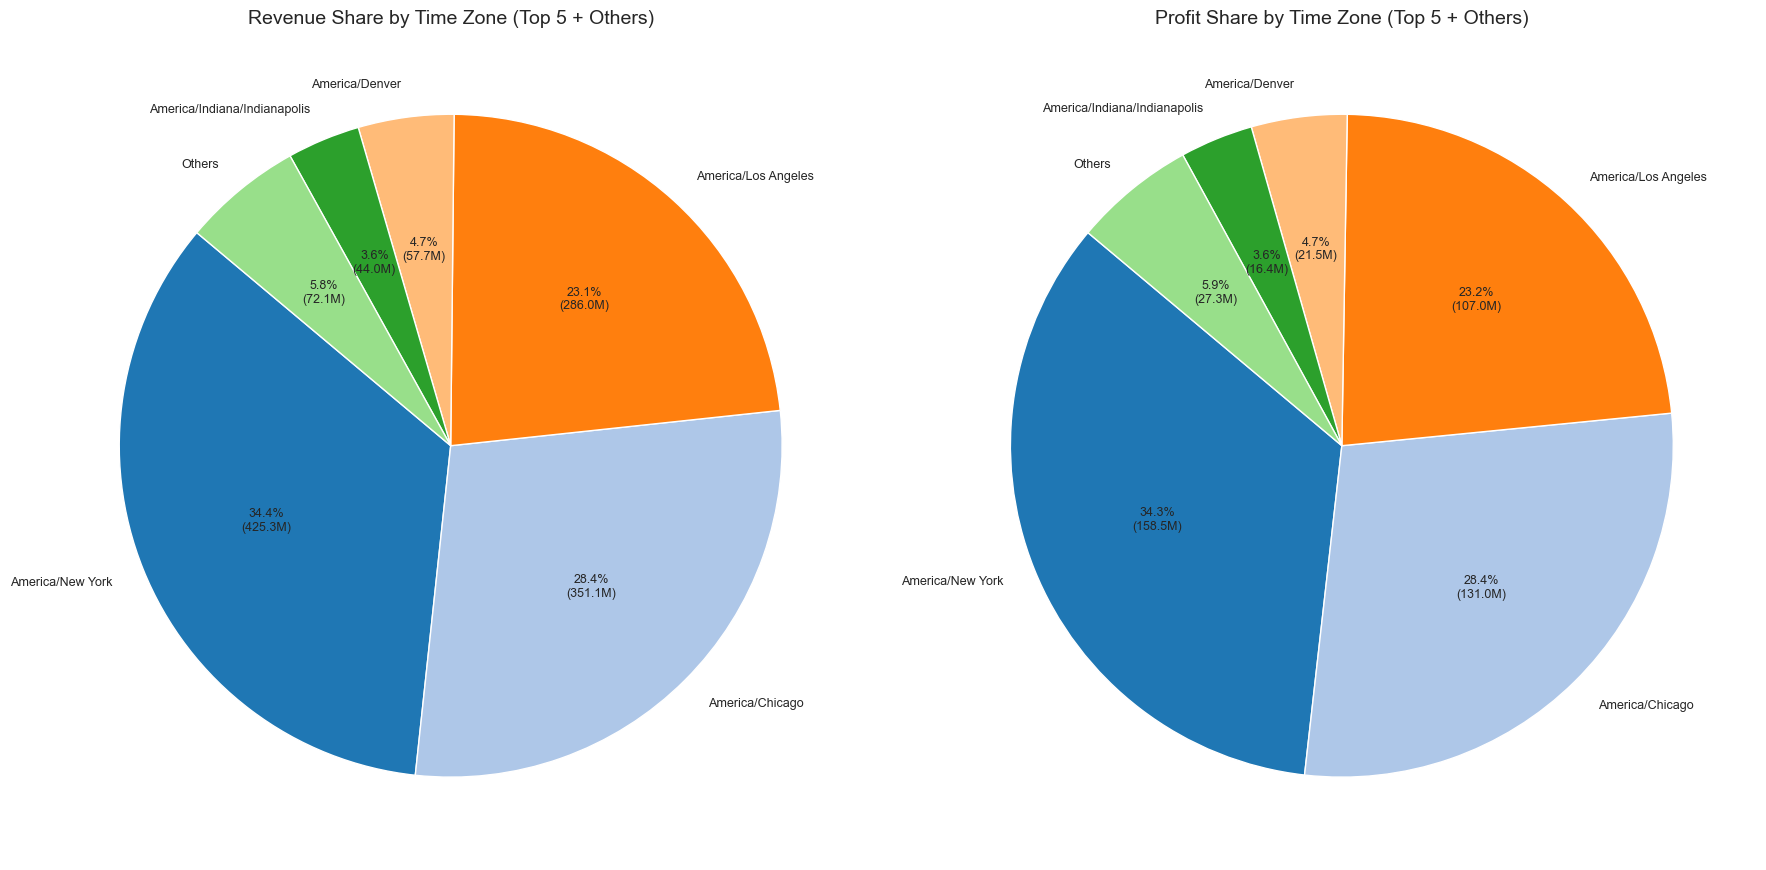

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate revenue and profit by time_zone
tz_revenue = df.groupby('time_zone')['revenue'].sum().sort_values(ascending=False)
tz_profit  = df.groupby('time_zone')['profit'].sum().sort_values(ascending=False)

# Function to keep top N and group rest as "Others"
def top_n_with_others(series, n=5):   # show more categories for readability
    top = series.head(n)
    others = series.iloc[n:].sum()
    if others > 0:
        top["Others"] = others
    return top

# Apply function
tz_revenue_top = top_n_with_others(tz_revenue, n=5)
tz_profit_top  = top_n_with_others(tz_profit, n=5)

# Set style
sns.set_theme(style="whitegrid")
colors = sns.color_palette("tab20")

# --- Bigger figure, smaller fonts ---
plt.figure(figsize=(18,9))   # larger canvas

plt.subplot(1,2,1)
plt.pie(tz_revenue_top, labels=tz_revenue_top.index,
        autopct=lambda p: f'{p:.1f}%\n({tz_revenue_top.sum()*p/100/1e6:.1f}M)',
        startangle=140, colors=colors, wedgeprops={'edgecolor':'white'},
        textprops={'fontsize':9})   # smaller font
plt.title("Revenue Share by Time Zone (Top 5 + Others)", fontsize=14)

plt.subplot(1,2,2)
plt.pie(tz_profit_top, labels=tz_profit_top.index,
        autopct=lambda p: f'{p:.1f}%\n({tz_profit_top.sum()*p/100/1e6:.1f}M)',
        startangle=140, colors=colors, wedgeprops={'edgecolor':'white'},
        textprops={'fontsize':9})   # smaller font
plt.title("Profit Share by Time Zone (Top 5 + Others)", fontsize=14)

plt.tight_layout()
plt.show()

**A KPI (Key Performance Indicator) is a measurable value that shows how effectively an organization is achieving its key objectives.** Businesses use KPIs to track progress toward strategic, financial, and operational goals.  

---

## 🔎 What Exactly Is a KPI?
- **Definition**: KPIs are quantifiable metrics that evaluate success against targets, benchmarks, or industry peers.  
- **Purpose**: They help organizations monitor performance, identify strengths and weaknesses, and make data-driven decisions.  
- **Flexibility**: KPIs vary by industry and context. For example:
  - A **software company** might track *year-over-year revenue growth*.  
  - A **retail chain** could focus on *same-store sales*.  
  - A **manufacturing firm** may measure *production efficiency*.  

---

## 📊 Common Types of KPIs
| **Category**        | **Examples**                                                                 |
|----------------------|------------------------------------------------------------------------------|
| **Financial KPIs**   | Revenue growth, net profit margin, return on investment (ROI)                |
| **Operational KPIs** | Production output, order fulfillment time, supply chain efficiency           |
| **Customer KPIs**    | Customer satisfaction score (CSAT), Net Promoter Score (NPS), churn rate     |
| **Employee KPIs**    | Employee turnover rate, training completion, productivity per employee       |
| **Marketing KPIs**   | Conversion rate, cost per acquisition (CPA), website traffic growth          |

---

## ✅ Why KPIs Matter
- **Alignment**: They ensure teams are working toward the same strategic goals.  
- **Decision-making**: Provide clear evidence for adjusting strategies.  
- **Benchmarking**: Compare performance against competitors or past results.  
- **Motivation**: Give employees tangible targets to strive for.  

---

## ⚠️ Key Considerations
- **KPIs must be SMART**: Specific, Measurable, Achievable, Relevant, and Time-bound.  
- **Too many KPIs dilute focus**: Organizations should prioritize a handful of meaningful indicators.  
- **Context matters**: A KPI that works in one industry may be irrelevant in another.  

---

👉 In short, **KPIs are the vital signs of a business**, helping leaders and teams understand whether they’re on track or need to adjust course.  

Would you like me to show you **examples of KPIs specifically for tech projects** (like software development or IT operations), since you’re working with BTech-level computer science topics?  

Sources: 


In [144]:
# Total revenue
total_revenue = df['revenue'].sum()

# Number of unique orders
num_orders = df['order_number'].nunique()

# Average Order Value
aov = total_revenue / num_orders

print(f"Average Order Value (AOV): {aov:.2f}")

Average Order Value (AOV): 115684.10


In [145]:
# AOV by sales channel (clean version)
aov_by_channel = (
    df.groupby('sales_channel')
      .apply(lambda g: g['revenue'].sum() / g['order_number'].nunique(), include_groups=False)
)

print(aov_by_channel)



# Compute revenue and order counts per channel
agg = df.groupby('sales_channel').agg(
    total_revenue=('revenue','sum'),
    order_count=('order_number','nunique')
)

# Calculate AOV
agg['AOV'] = agg['total_revenue'] / agg['order_count']

print(agg[['AOV']])

sales_channel
Distributor    116328.061478
Export         113604.947170
Wholesale      115885.751717
dtype: float64
                         AOV
sales_channel               
Distributor    116328.061478
Export         113604.947170
Wholesale      115885.751717


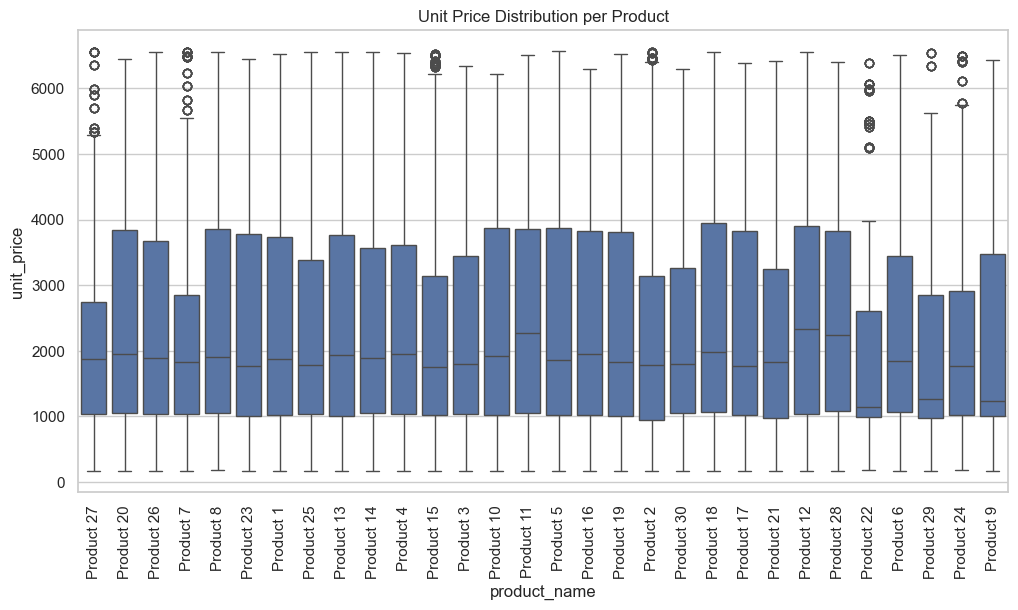

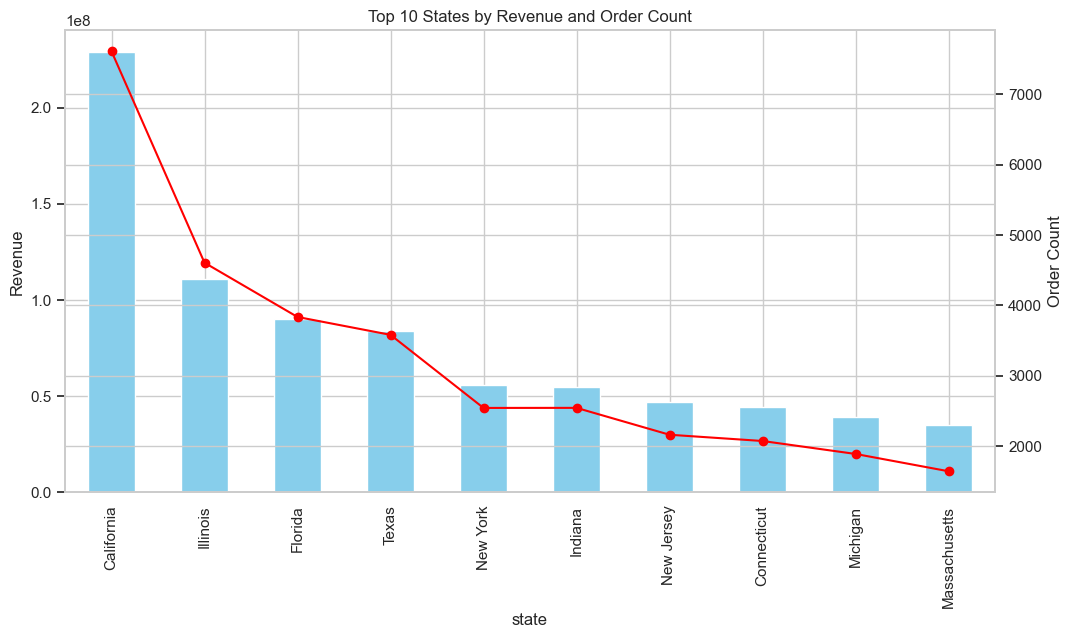

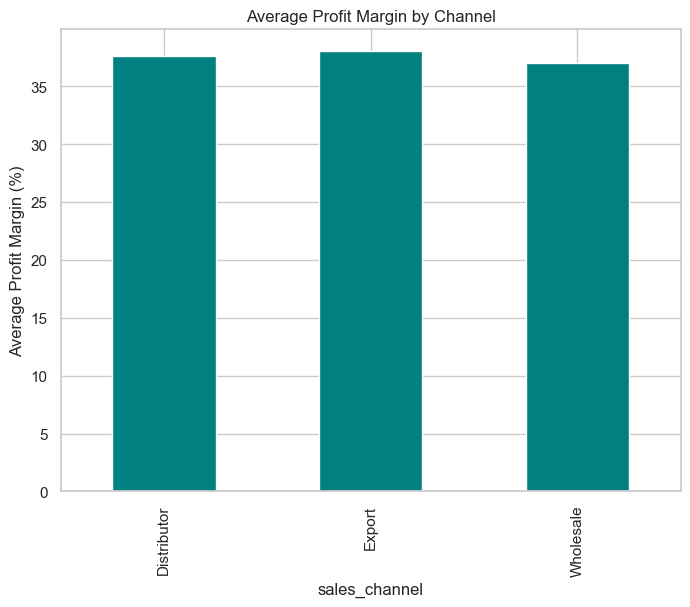

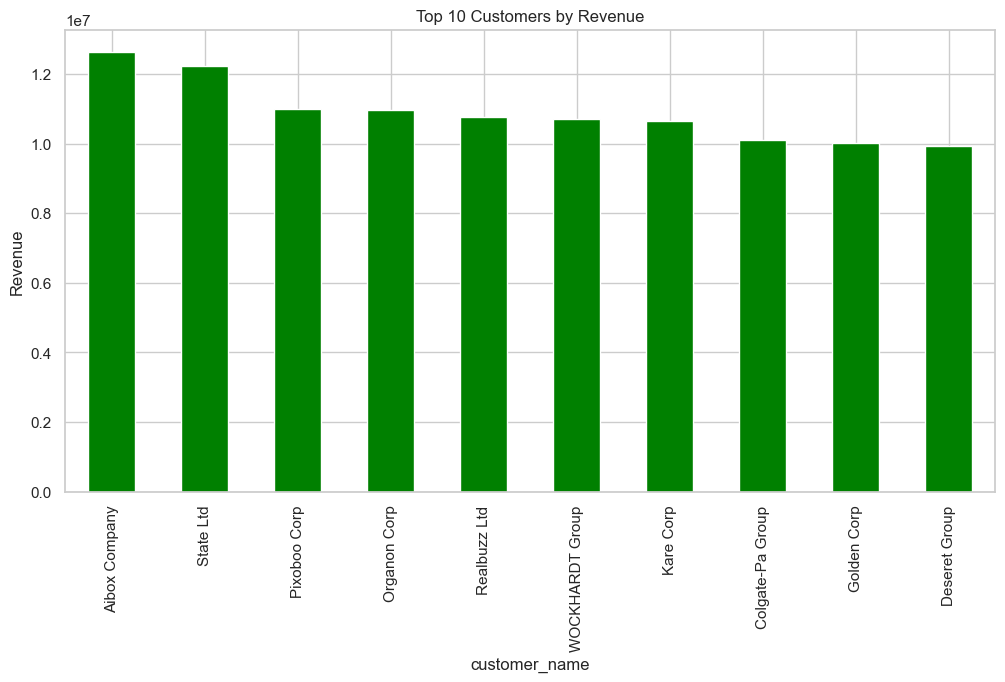

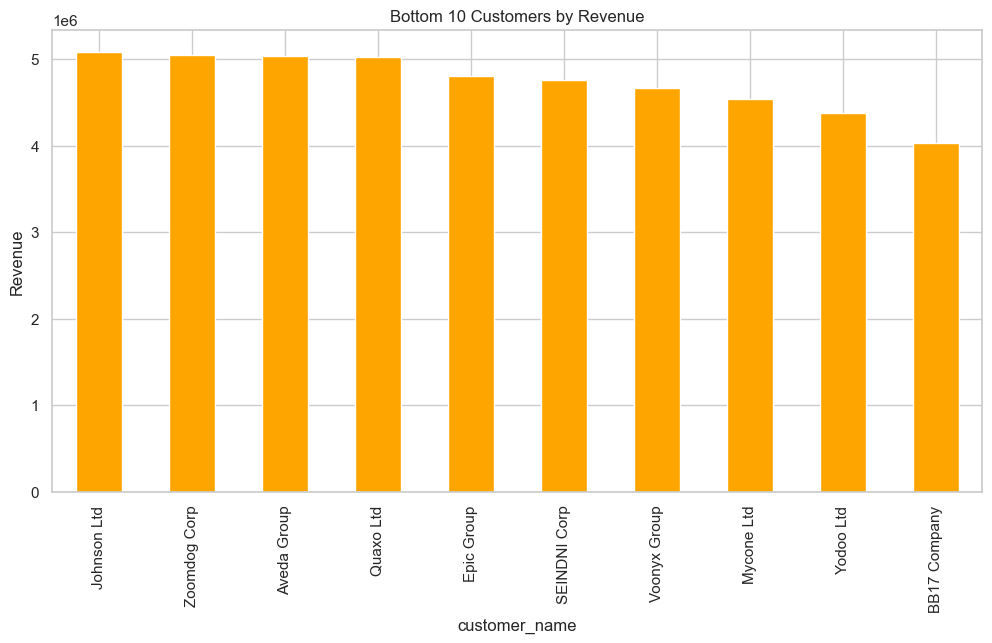

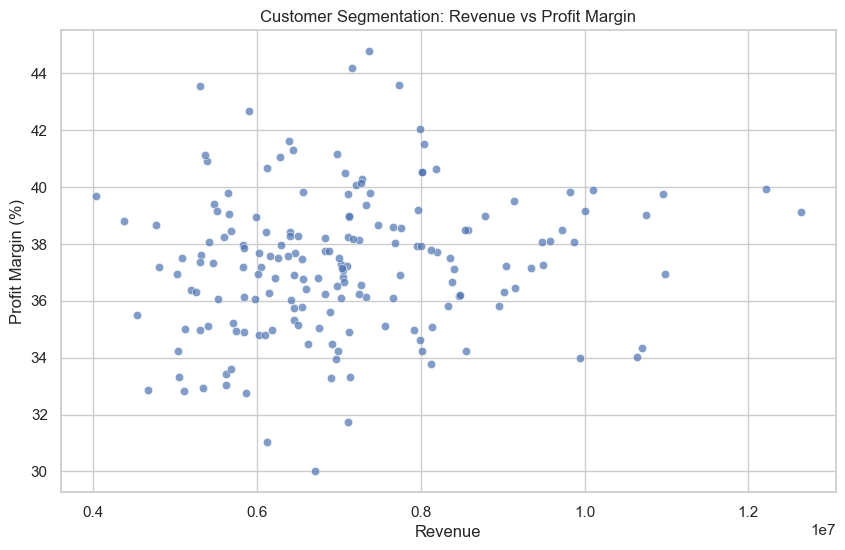

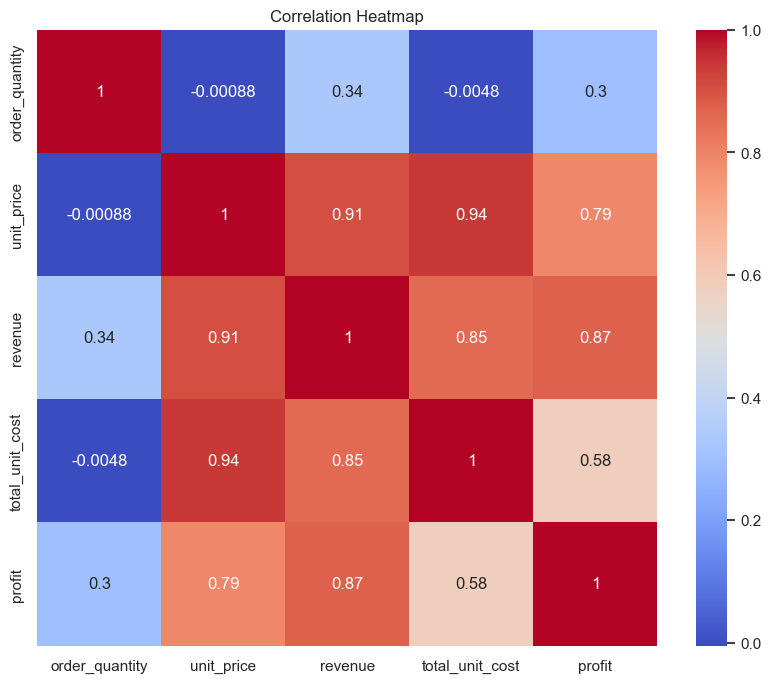

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# 1️⃣ Unit Price Distribution per Product
plt.figure(figsize=(12,6))
sns.boxplot(x='product_name', y='unit_price', data=df)
plt.xticks(rotation=90)
plt.title('Unit Price Distribution per Product')
plt.show()

# 2️⃣ Top 10 States by Revenue and Order Count
state_agg = df.groupby('state').agg(
    revenue=('revenue','sum'),
    order_count=('order_number','nunique')
).sort_values('revenue', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12,6))
state_agg['revenue'].plot(kind='bar', ax=ax1, color='skyblue', label='Revenue')
ax1.set_ylabel('Revenue')
ax2 = ax1.twinx()
state_agg['order_count'].plot(kind='line', ax=ax2, color='red', marker='o', label='Order Count')
ax2.set_ylabel('Order Count')
plt.title('Top 10 States by Revenue and Order Count')
plt.show()

# 3️⃣ Average Profit Margin by Channel
channel_margin = df.groupby('sales_channel').apply(
    lambda g: (g['profit'].sum() / g['revenue'].sum()) * 100,
    include_groups=False
)
plt.figure(figsize=(8,6))
channel_margin.plot(kind='bar', color='teal')
plt.ylabel('Average Profit Margin (%)')
plt.title('Average Profit Margin by Channel')
plt.show()

# 4️⃣ Top and Bottom 10 Customers by Revenue
customer_revenue = df.groupby('customer_name')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
customer_revenue.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Customers by Revenue')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=(12,6))
customer_revenue.tail(10).plot(kind='bar', color='orange')
plt.title('Bottom 10 Customers by Revenue')
plt.ylabel('Revenue')
plt.show()

# 5️⃣ Customer Segmentation: Revenue vs Profit Margin
customer_seg = df.groupby('customer_name').agg(
    revenue=('revenue','sum'),
    profit=('profit','sum')
)
customer_seg['profit_margin'] = customer_seg['profit'] / customer_seg['revenue'] * 100

plt.figure(figsize=(10,6))
sns.scatterplot(x='revenue', y='profit_margin', data=customer_seg, alpha=0.7)
plt.title('Customer Segmentation: Revenue vs Profit Margin')
plt.xlabel('Revenue')
plt.ylabel('Profit Margin (%)')
plt.show()

# 6️⃣ Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[['order_quantity','unit_price','revenue','total_unit_cost','profit']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Great question, Arkojyoti 👌. Based on the scatter plot titled **"Customer Segmentation: Revenue vs Profit Margin"**, here are the key insights you can draw:

---

### 🔍 1. **High Revenue ≠ High Margin**
- Some customers generate **high revenue** but have **moderate or low profit margins**.
- This suggests that **volume-heavy clients** may be less profitable per unit — possibly due to discounts, bulk pricing, or higher service costs.

---

### 💎 2. **Sweet Spot Customers**
- Look for clusters in the **top-right quadrant**:  
  - These customers have **high revenue** and **high profit margins**.
  - They are your **most valuable clients** — ideal for retention, upselling, and loyalty programs.

---

### ⚠️ 3. **Low Margin Outliers**
- If you see dots with **high revenue but low margins**, they may be:
  - Costly to serve
  - Underpriced
  - In need of renegotiation or efficiency improvements

---

### 🧠 4. **Segmentation Opportunities**
- You can segment customers into:
  - **Premium**: High revenue + high margin
  - **Volume-driven**: High revenue + low margin
  - **Niche**: Low revenue + high margin
  - **Low-value**: Low revenue + low margin

This helps tailor marketing, pricing, and service strategies.

---

### 📈 5. **Profit Margin Stability**
- If most points fall within a narrow vertical band (e.g., 30–45%), it shows **profit margins are relatively stable** across customers — which is good for forecasting.

---

Would you like me to help you **label these segments visually** on the chart (e.g., color-code quadrants or annotate top customers)? That would make the insights even clearer for presentations or reports.


In [148]:
df.columns

Index(['order_number', 'order_date', 'sales_channel', 'currency_code',
       'warehouse_code', 'order_quantity', 'unit_price', 'revenue',
       'total_unit_cost', 'customer_name', 'product_name', 'region_name',
       'county', 'state', 'region_type', 'latitude', 'longitude', 'area_code',
       'region_population', 'region_households', 'region_median_income',
       'land_area', 'water_area', 'time_zone', 'region', 'budget_2017',
       'profit', 'year_month'],
      dtype='object')

In [164]:
df.head(2)

,order_number,order_date,sales_channel,currency_code,warehouse_code,order_quantity,unit_price,revenue,total_unit_cost,customer_name,product_name,region_name,county,state,region_type,latitude,longitude,area_code,region_population,region_households,region_median_income,land_area,water_area,time_zone,region,budget_2017,profit,year_month,order_month_name,order_month_number
0,SO - 000225,2014-01-01,Wholesale,USD,AXW291,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,NaN,4048.542,2014-01-01,January,1
1,SO - 0003378,2014-01-01,Distributor,USD,AXW291,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,NaN,11899.602,2014-01-01,January,1


In [153]:
for i in dir(df):
    if("type" in i):
        print(i)

_is_homogeneous_type
_is_mixed_type
_validate_dtype
astype
convert_dtypes
dtypes
region_type
select_dtypes


In [155]:
df.dtypes

order_number                    object
order_date              datetime64[ns]
sales_channel                   object
currency_code                   object
warehouse_code                  object
order_quantity                   int64
unit_price                     float64
revenue                        float64
total_unit_cost                float64
customer_name                   object
product_name                    object
region_name                     object
county                          object
state                           object
region_type                     object
latitude                       float64
longitude                      float64
area_code                        int64
region_population                int64
region_households                int64
region_median_income             int64
land_area                        int64
water_area                       int64
time_zone                       object
region                          object
budget_2017              

In [156]:
df["order_month_name"]=df["order_date"].dt.month_name()


In [163]:
df["order_month_number"]=df["order_date"].dt.month


In [169]:
help(df.to_excel)

Help on method to_excel in module pandas.core.generic:

to_excel(
    excel_writer: 'FilePath | WriteExcelBuffer | ExcelWriter',
    *,
    sheet_name: 'str' = 'Sheet1',
    na_rep: 'str' = '',
    float_format: 'str | None' = None,
    columns: 'Sequence[Hashable] | None' = None,
    header: 'Sequence[Hashable] | bool_t' = True,
    index: 'bool_t' = True,
    index_label: 'IndexLabel | None' = None,
    startrow: 'int' = 0,
    startcol: 'int' = 0,
    engine: "Literal['openpyxl', 'xlsxwriter'] | None" = None,
    merge_cells: 'bool_t' = True,
    inf_rep: 'str' = 'inf',
    freeze_panes: 'tuple[int, int] | None' = None,
    storage_options: 'StorageOptions | None' = None,
    engine_kwargs: 'dict[str, Any] | None' = None
) -> 'None' method of pandas.core.frame.DataFrame instance
    Write object to an Excel sheet.

    To write a single object to an Excel .xlsx file it is only necessary to
    specify a target file name. To write to multiple sheets it is necessary to
    create an `

In [172]:
print(df.info)
print(df.columns)

<bound method DataFrame.info of        order_number order_date sales_channel currency_code warehouse_code  \
0       SO - 000225 2014-01-01     Wholesale           USD         AXW291   
1      SO - 0003378 2014-01-01   Distributor           USD         AXW291   
2      SO - 0005126 2014-01-01     Wholesale           USD         AXW291   
3      SO - 0005614 2014-01-01        Export           USD         AXW291   
4      SO - 0005781 2014-01-01     Wholesale           USD         AXW291   
...             ...        ...           ...           ...            ...   
64099  SO - 0007573 2018-02-28     Wholesale           USD         AXW291   
64100  SO - 0007706 2018-02-28        Export           USD         NXH382   
64101  SO - 0007718 2018-02-28   Distributor           USD         AXW291   
64102  SO - 0008084 2018-02-28   Distributor           USD         AXW291   
64103  SO - 0008654 2018-02-28   Distributor           USD         AXW291   

       order_quantity  unit_price  revenue 

## removing 2018 wala records as these can hamer pattern as it only hs 2 months

In [174]:
df=df[df["order_date"].dt.year != 2018]


In [176]:
df.to_excel("sample.xlsx",index=False)

In [167]:
# df['order_date']

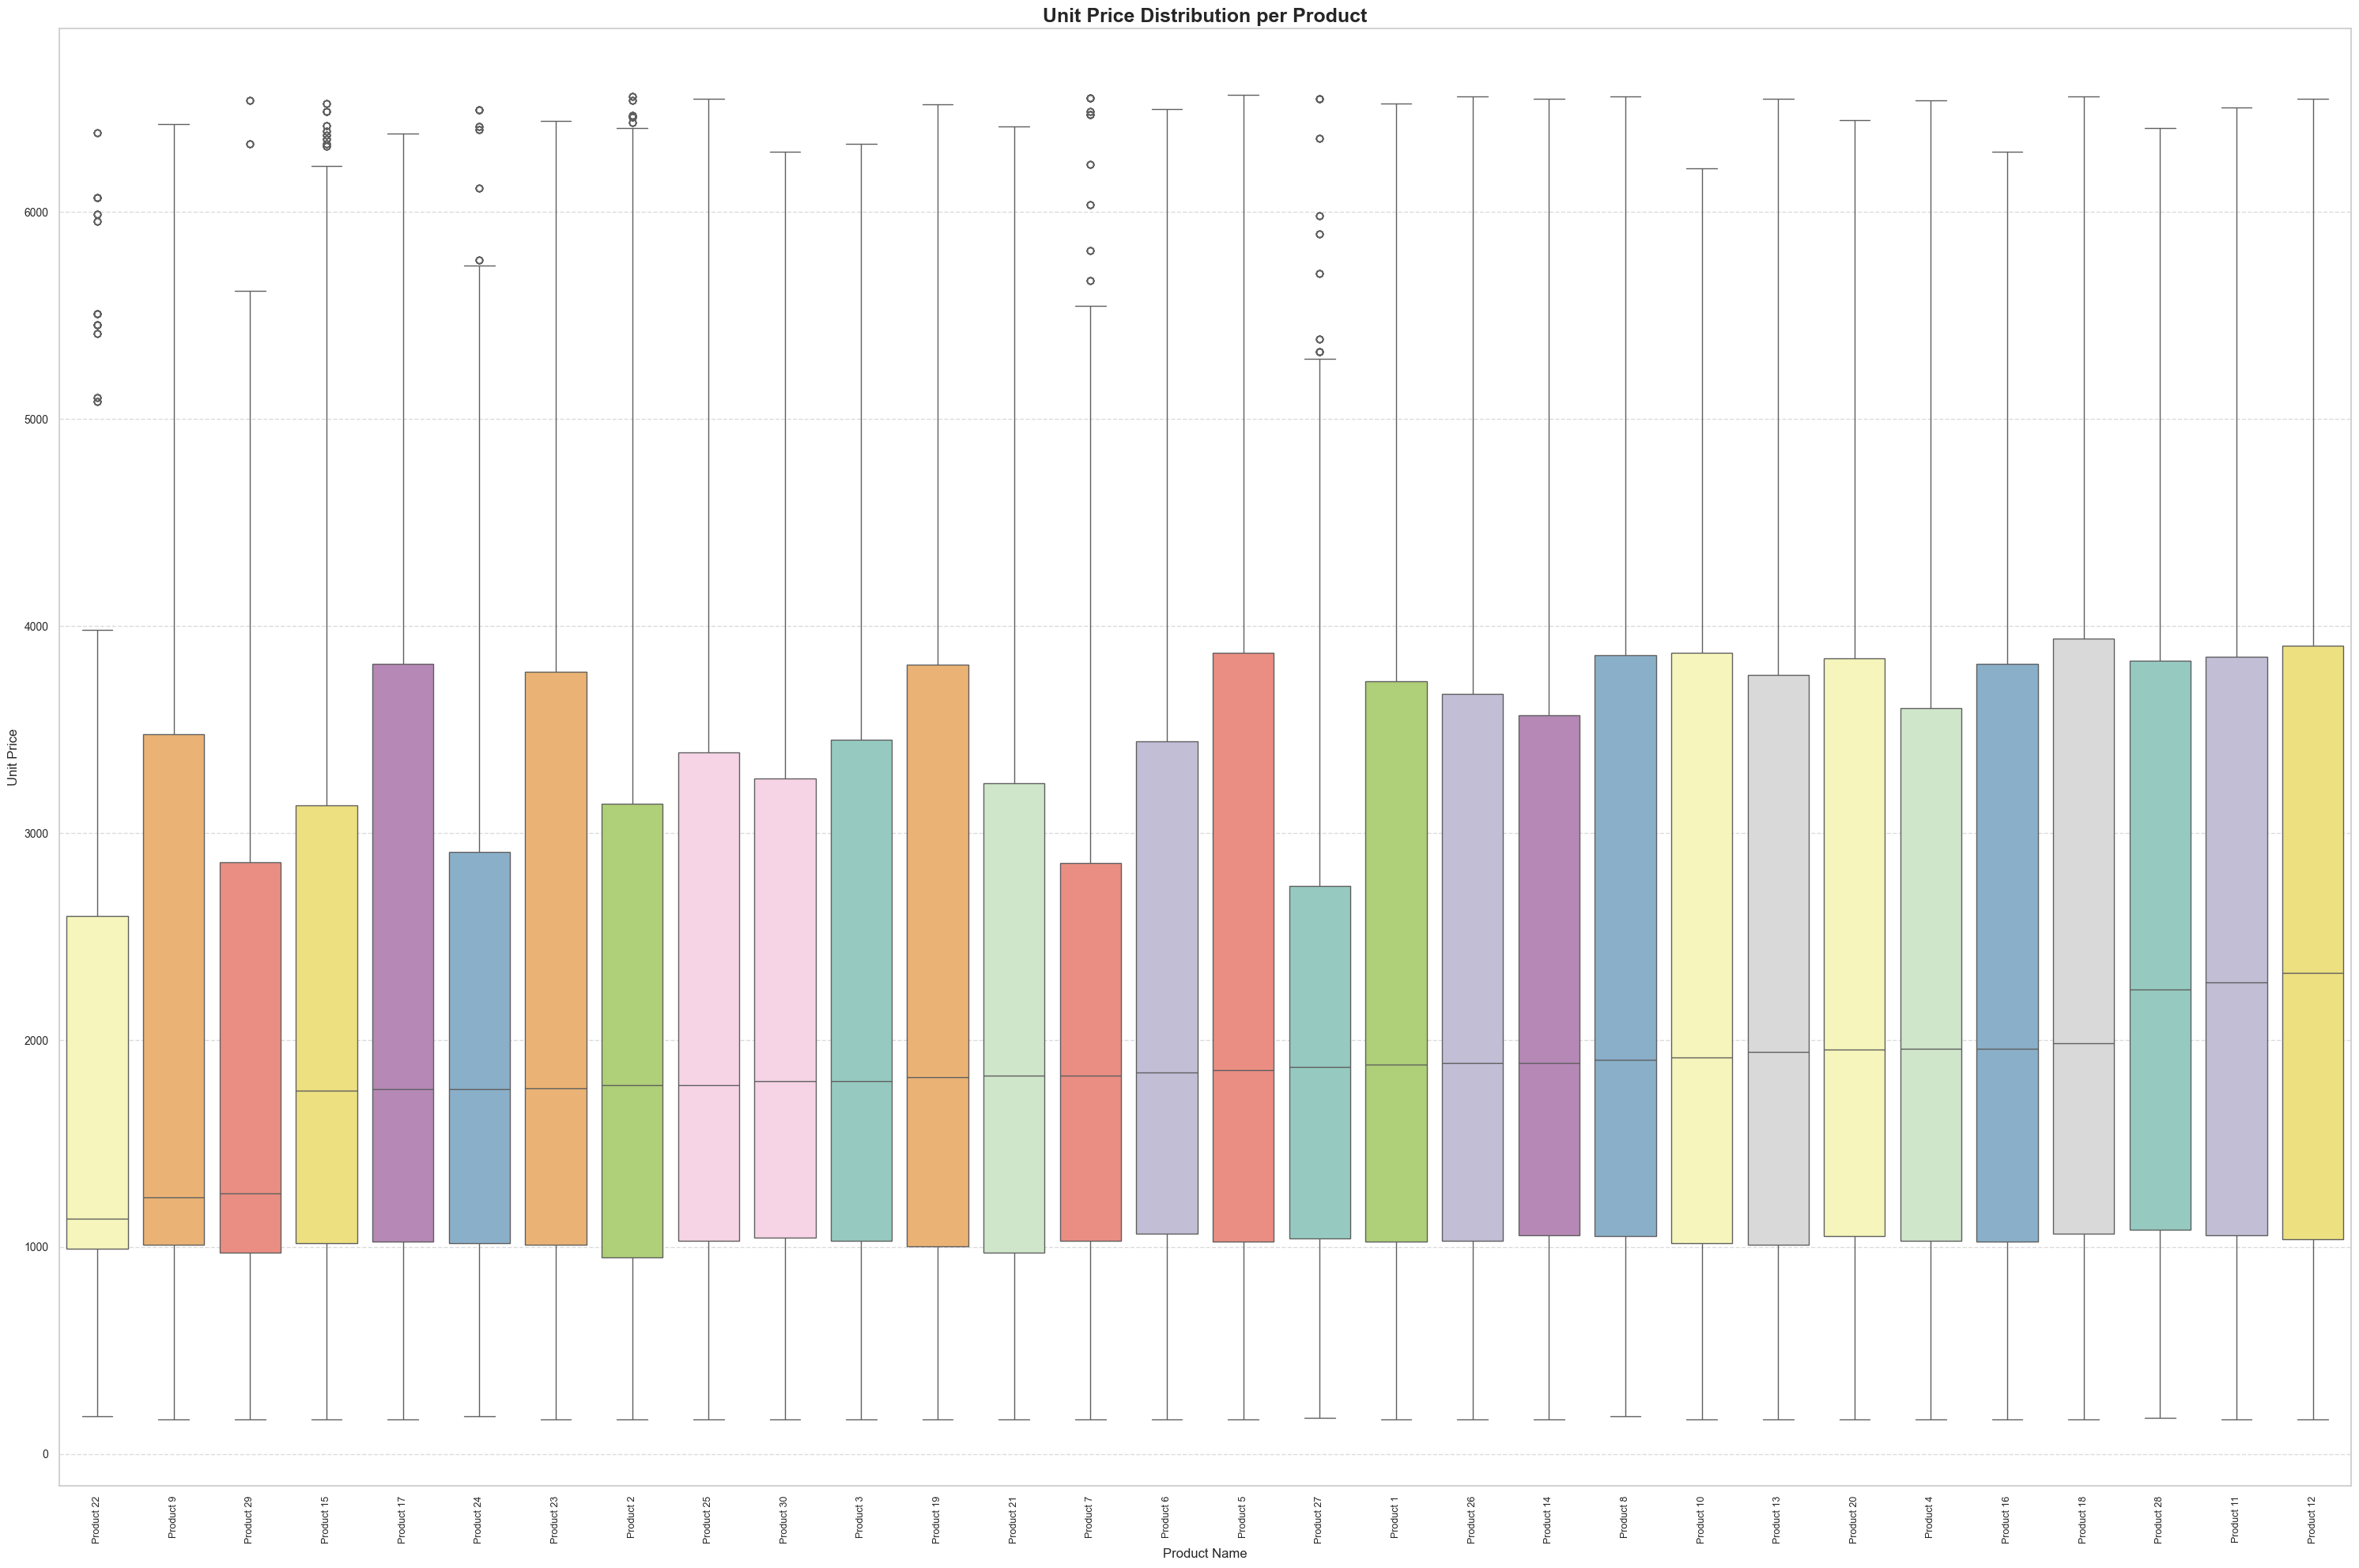

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort products by median unit price for better readability
product_order = df.groupby('product_name')['unit_price'].median().sort_values().index

plt.figure(figsize=(30,20))
sns.boxplot(x='product_name', y='unit_price', data=df,
            order=product_order, palette="Set3",hue='product_name',legend=False)

# Improve readability
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=10)
plt.title('Unit Price Distribution per Product', fontsize=18, fontweight='bold')
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Unit Price', fontsize=12)

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()